The temperature anomaly values (No_Smoothing and Lowess5) are sourced directly from NASA’s GISTEMP dataset. These values represent pre-calculated global temperature anomalies relative to the 1951–1980 baseline average.

The GISTEMP anomalies are computed using temperature observations and are relative to the 1951–1980 average. The smoothing is performed using a Lowess filter to highlight long-term trends.

Land-Ocean Temperature Index (C)
--------------------------------
Year No_Smoothing  Lowess(5)


As stated in the file header, the data includes the global Land-Ocean Temperature Index and both the raw and smoothed annual temperature anomalies, pre-processed and provided by NASA.

So,we did not manually compute the anomalies; instead, we used NASA’s GISTEMP dataset, which provides both raw (No_Smoothing) and smoothed (Lowess5) global temperature anomalies already calculated based on a 1951–1980 baseline.

(https://climate.nasa.gov/vital-signs/global-temperature/?intent=121)
https://data.giss.nasa.gov/gistemp/

## NOTE:
understanding the difference between **“No Smoothing”** and **“Smoothing”** is key when analyzing time-series data like global temperature anomalies.

---

### What is "No Smoothing"?

**“No Smoothing”** refers to the **raw yearly values** from the dataset.

- Each value represents the exact recorded **temperature anomaly** for that year.
- It includes all natural **year-to-year fluctuations**, such as:
  - El Niño / La Niña events
  - Volcanic eruptions
  - Random climate variability

These raw data points can be “noisy” — they jump up and down even if the long-term trend is increasing.

Example:  
- 1991 (cooler, after Mt. Pinatubo)
- 1998 or 2016 (spikes from El Niño)

---

### What is "Smoothing"?

**“Smoothing”** is a technique used to reduce noise and better reveal the **underlying trend**.

In the dataset, smoothing is done using:
> **Lowess(5)** = **Locally Weighted Smoothing** with a **5-year window**

### What does that mean?
- For each year, the value is replaced by a **weighted average of nearby years** (usually ±2 years).
- This removes short-term ups and downs, showing a clearer **long-term trend**.

Example:  
- Instead of showing a sudden spike in 1998, the **Lowess curve** smooths it out by blending it with 1996–2000 data.

---

### Why Use Both?

| Feature         | No Smoothing (Raw)         | Smoothing (Lowess)        |
|------------------|-----------------------------|----------------------------|
| Shows real fluctuations |  Yes | Not fully |
| Highlights long-term trend | Harder | Much clearer |
| Good for detecting extremes |  Yes | Not ideal |
| Best for overall pattern | Noisy |  Smooth and clean |

---

### Hence:

- **Use No Smoothing** to explore specific events or short-term climate behavior.
- **Use Smoothing** to clearly see how the climate is changing over time.



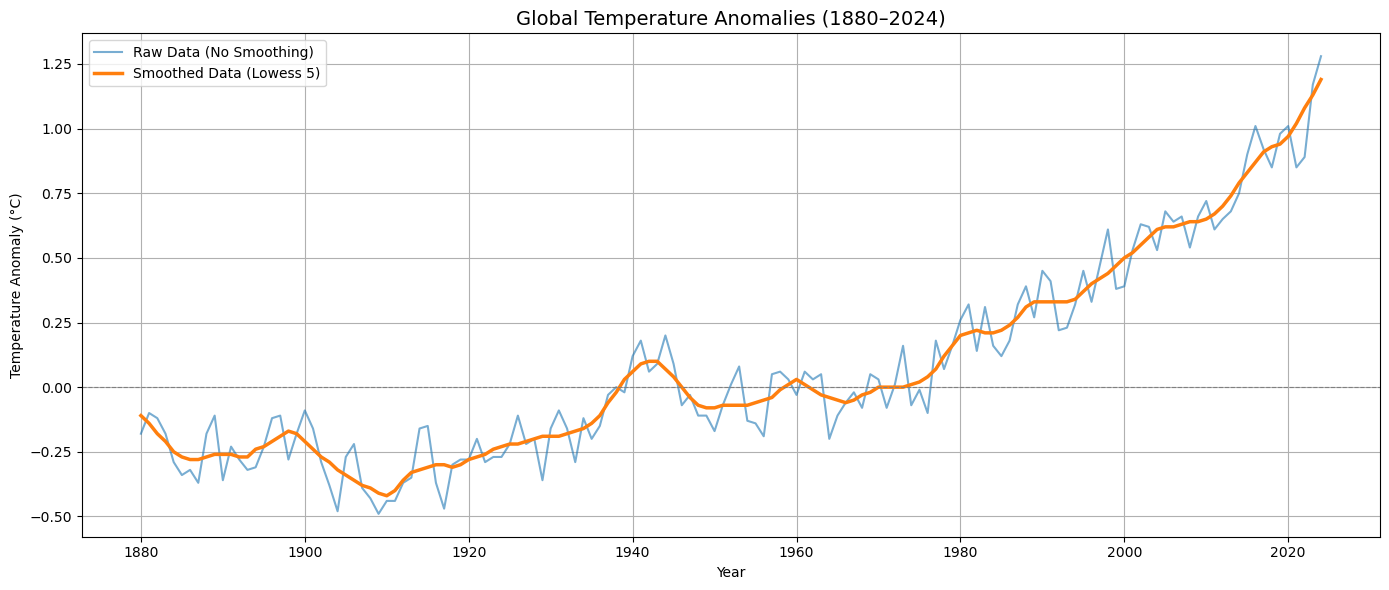

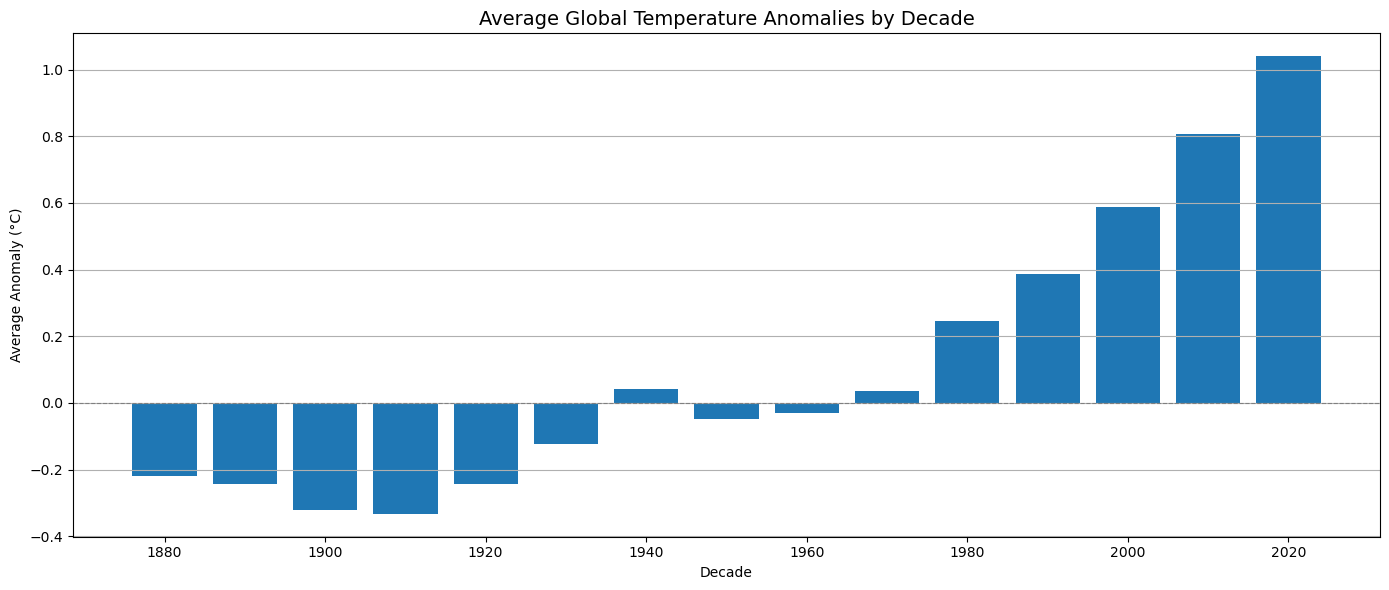

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the temperature data
file_path = "C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt"

# Read the data, skipping initial header rows and setting correct delimiters
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=5, names=["Year", "No_Smoothing", "Lowess5"])

# Drop any rows with missing data
data.dropna(inplace=True)

# Normalize temperature data (optional step for further comparison or scaling)
# Here we use min-max normalization for demonstration
#Though not needed for the plots, normalization is a good exploratory tool —
# especially if we later compare it to other datasets like CO₂ or sea level.
data['No_Smoothing_Norm'] = (data['No_Smoothing'] - data['No_Smoothing'].min()) / (data['No_Smoothing'].max() - data['No_Smoothing'].min())
data['Lowess5_Norm'] = (data['Lowess5'] - data['Lowess5'].min()) / (data['Lowess5'].max() - data['Lowess5'].min())

# First Visual: Raw vs Smoothed Line Plot (to see real anomalies vs. smoothed trend)
plt.figure(figsize=(14, 6))
plt.plot(data['Year'], data['No_Smoothing'], label='Raw Data (No Smoothing)', alpha=0.6)
plt.plot(data['Year'], data['Lowess5'], label='Smoothed Data (Lowess 5)', linewidth=2.5)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Global Temperature Anomalies (1880–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate decadal averages for second visual
data['Decade'] = (data['Year'] // 10) * 10
decadal_avg = data.groupby('Decade')['No_Smoothing'].mean().reset_index()

# Second Visual: Decadal Averages Bar Chart
plt.figure(figsize=(14, 6))
plt.bar(decadal_avg['Decade'], decadal_avg['No_Smoothing'], width=8)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Average Global Temperature Anomalies by Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Average Anomaly (°C)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [9]:
# Print the lists of temperature anomalies

print("📍 List of Raw Temperature Anomalies (No_Smoothing):")
print(data['No_Smoothing'].tolist())

print("\n📍 List of Smoothed Temperature Anomalies (Lowess5):")
print(data['Lowess5'].tolist())



📍 List of Raw Temperature Anomalies (No_Smoothing):
[-0.18, -0.1, -0.12, -0.18, -0.29, -0.34, -0.32, -0.37, -0.18, -0.11, -0.36, -0.23, -0.28, -0.32, -0.31, -0.23, -0.12, -0.11, -0.28, -0.18, -0.09, -0.16, -0.29, -0.38, -0.48, -0.27, -0.22, -0.39, -0.43, -0.49, -0.44, -0.44, -0.37, -0.35, -0.16, -0.15, -0.37, -0.47, -0.3, -0.28, -0.28, -0.2, -0.29, -0.27, -0.27, -0.22, -0.11, -0.22, -0.2, -0.36, -0.16, -0.09, -0.16, -0.29, -0.12, -0.2, -0.15, -0.03, 0.0, -0.02, 0.12, 0.18, 0.06, 0.09, 0.2, 0.09, -0.07, -0.03, -0.11, -0.11, -0.17, -0.07, 0.01, 0.08, -0.13, -0.14, -0.19, 0.05, 0.06, 0.03, -0.03, 0.06, 0.03, 0.05, -0.2, -0.11, -0.06, -0.02, -0.08, 0.05, 0.03, -0.08, 0.01, 0.16, -0.07, -0.01, -0.1, 0.18, 0.07, 0.16, 0.26, 0.32, 0.14, 0.31, 0.16, 0.12, 0.18, 0.32, 0.39, 0.27, 0.45, 0.41, 0.22, 0.23, 0.32, 0.45, 0.33, 0.47, 0.61, 0.38, 0.39, 0.53, 0.63, 0.62, 0.53, 0.68, 0.64, 0.66, 0.54, 0.66, 0.72, 0.61, 0.65, 0.68, 0.75, 0.9, 1.01, 0.92, 0.85, 0.98, 1.01, 0.85, 0.89, 1.17, 1.28]

📍 List o

In [10]:
print("\n Year | No_Smoothing | Lowess5")
for index, row in data.iterrows():
    print(f"{row['Year']} | {row['No_Smoothing']} | {row['Lowess5']}")



 Year | No_Smoothing | Lowess5
1880.0 | -0.18 | -0.11
1881.0 | -0.1 | -0.14
1882.0 | -0.12 | -0.18
1883.0 | -0.18 | -0.21
1884.0 | -0.29 | -0.25
1885.0 | -0.34 | -0.27
1886.0 | -0.32 | -0.28
1887.0 | -0.37 | -0.28
1888.0 | -0.18 | -0.27
1889.0 | -0.11 | -0.26
1890.0 | -0.36 | -0.26
1891.0 | -0.23 | -0.26
1892.0 | -0.28 | -0.27
1893.0 | -0.32 | -0.27
1894.0 | -0.31 | -0.24
1895.0 | -0.23 | -0.23
1896.0 | -0.12 | -0.21
1897.0 | -0.11 | -0.19
1898.0 | -0.28 | -0.17
1899.0 | -0.18 | -0.18
1900.0 | -0.09 | -0.21
1901.0 | -0.16 | -0.24
1902.0 | -0.29 | -0.27
1903.0 | -0.38 | -0.29
1904.0 | -0.48 | -0.32
1905.0 | -0.27 | -0.34
1906.0 | -0.22 | -0.36
1907.0 | -0.39 | -0.38
1908.0 | -0.43 | -0.39
1909.0 | -0.49 | -0.41
1910.0 | -0.44 | -0.42
1911.0 | -0.44 | -0.4
1912.0 | -0.37 | -0.36
1913.0 | -0.35 | -0.33
1914.0 | -0.16 | -0.32
1915.0 | -0.15 | -0.31
1916.0 | -0.37 | -0.3
1917.0 | -0.47 | -0.3
1918.0 | -0.3 | -0.31
1919.0 | -0.28 | -0.3
1920.0 | -0.28 | -0.28
1921.0 | -0.2 | -0.27
1922.0 | 

In [11]:
# Filter for specific years
start_year = 1980
end_year = 2024

temp_1980 = data[data['Year'] == start_year]['No_Smoothing'].values[0]
temp_2024 = data[data['Year'] == end_year]['No_Smoothing'].values[0]

# Print the results
print(f"🌡️ Temperature anomaly in {start_year}: {temp_1980:.2f}°C")
print(f"🌡️ Temperature anomaly in {end_year}: {temp_2024:.2f}°C")


🌡️ Temperature anomaly in 1980: 0.26°C
🌡️ Temperature anomaly in 2024: 1.28°C


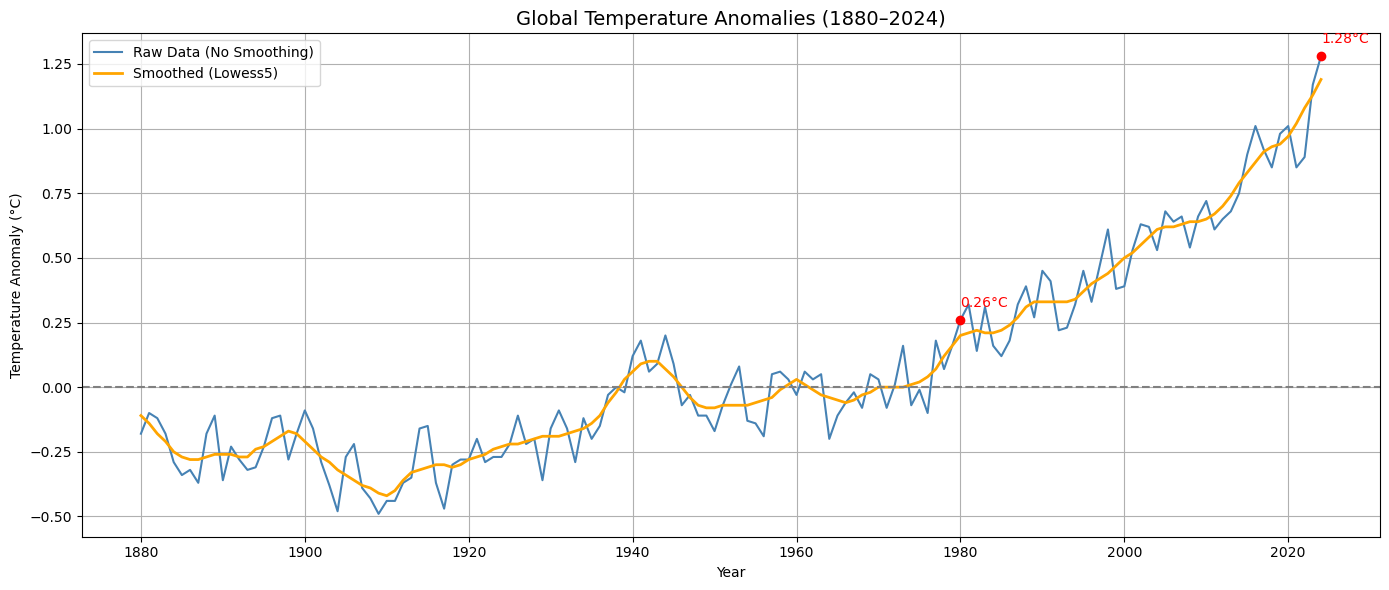

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv("C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt", delim_whitespace=True, skiprows=5,
                   names=["Year", "No_Smoothing", "Lowess5"])
data.dropna(inplace=True)

# Extract values for 1980 and 2024
temp_1980 = data[data['Year'] == 1980]['No_Smoothing'].values[0]
temp_2024 = data[data['Year'] == 2024]['No_Smoothing'].values[0]

# Plot the full anomaly line
plt.figure(figsize=(14, 6))
plt.plot(data['Year'], data['No_Smoothing'], label='Raw Data (No Smoothing)', color='steelblue')
plt.plot(data['Year'], data['Lowess5'], label='Smoothed (Lowess5)', color='orange', linewidth=2)

# Highlight 1980 and 2024
plt.scatter([1980, 2024], [temp_1980, temp_2024], color='red', zorder=5)
plt.text(1980, temp_1980 + 0.05, f"{temp_1980:.2f}°C", color='red')
plt.text(2024, temp_2024 + 0.05, f"{temp_2024:.2f}°C", color='red')

plt.title("Global Temperature Anomalies (1880–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



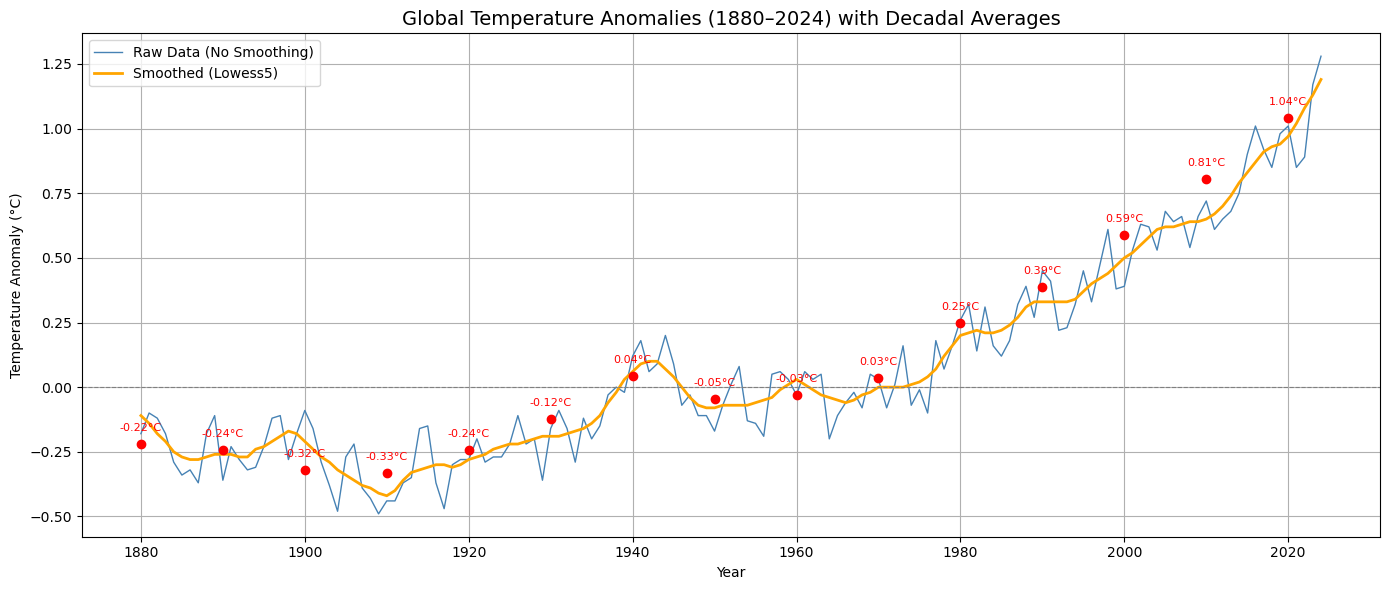

In [13]:
# Reload the data now that the file has been re-uploaded
file_path = "C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt"
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=5, names=["Year", "No_Smoothing", "Lowess5"])
data.dropna(inplace=True)

# Create a decade column
data['Decade'] = (data['Year'] // 10) * 10

# Calculate average anomaly per decade
decadal_avg = data.groupby('Decade')['No_Smoothing'].mean().reset_index()

# Plot the original line chart
plt.figure(figsize=(14, 6))
plt.plot(data['Year'], data['No_Smoothing'], label='Raw Data (No Smoothing)', color='steelblue', linewidth=1)
plt.plot(data['Year'], data['Lowess5'], label='Smoothed (Lowess5)', color='orange', linewidth=2)

# Highlight decadal averages with red dots and labels
for i, row in decadal_avg.iterrows():
    plt.scatter(row['Decade'], row['No_Smoothing'], color='red', zorder=5)
    plt.text(row['Decade'], row['No_Smoothing'] + 0.05, f"{row['No_Smoothing']:.2f}°C", 
             ha='center', color='red', fontsize=8)

plt.title("Global Temperature Anomalies (1880–2024) with Decadal Averages", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


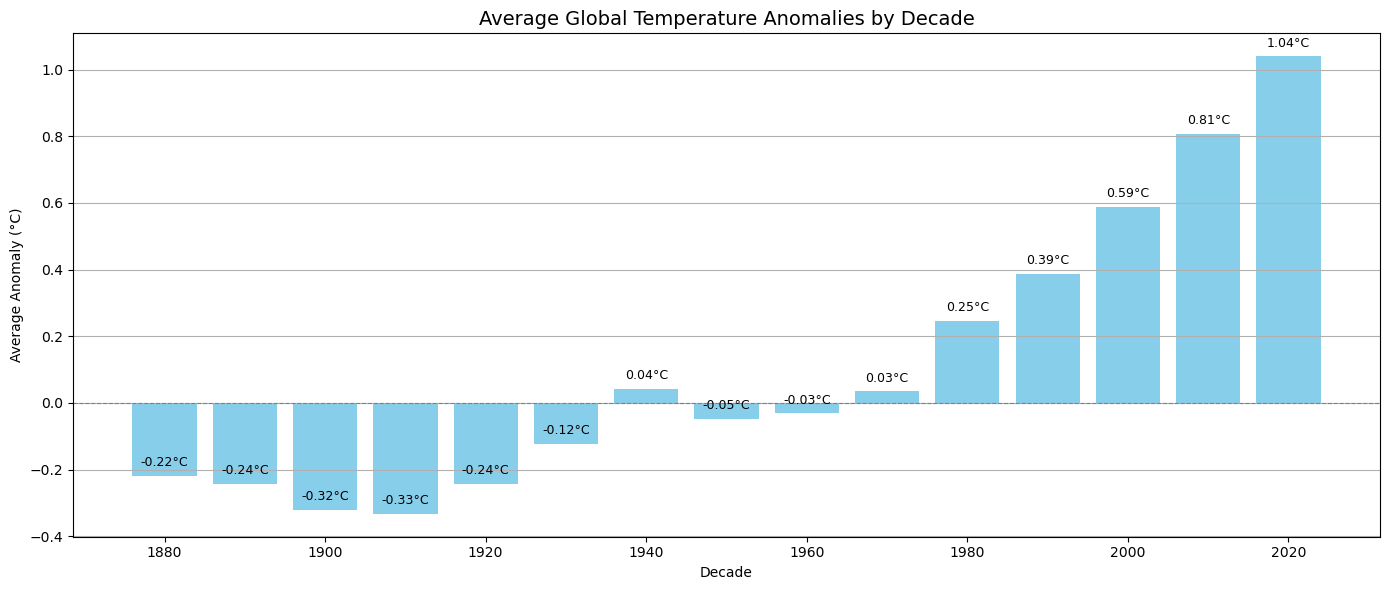

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the NASA data
file_path = "C:/Users/greth/OneDrive/Desktop/NOROFF-DATA SCIENC/2ND YEAR/STUDIO 2/DATABASE/GLOBAL TEMP FROM NASA.txt"
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=5, names=["Year", "No_Smoothing", "Lowess5"])
data.dropna(inplace=True)

# Create a 'Decade' column
data['Decade'] = (data['Year'] // 10) * 10

# Group by decade and calculate average anomaly
decadal_avg = data.groupby('Decade')['No_Smoothing'].mean().reset_index()

# Plot the decade averages
plt.figure(figsize=(14, 6))
bars = plt.bar(decadal_avg['Decade'], decadal_avg['No_Smoothing'], width=8, color='skyblue')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Average Global Temperature Anomalies by Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Average Anomaly (°C)")
plt.grid(axis='y')

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}°C", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



Here are the two visualizations generated from the **NASA Global Temperature dataset (1880–2024)**, along with the code that:

1. **Cleans** the data (removes missing entries).
2. **Normalizes** it (min-max scaling).
3. **Visualizes**:
   - Yearly raw vs smoothed anomalies.
   - Decadal average anomalies.

---

### Key Steps in the Code:
#### **Cleaning**:
- Skipped the header.
- Named the columns: `Year`, `No_Smoothing`, and `Lowess5`.
- Dropped any rows with missing data.

**No_Smoothing** - Real temperature change in that exact year. The raw yearly data. It shows all the ups and downs, including the short-term fluctuations due to El Nino, La Nina, Volcanic Eruptions, Seasonal variations, data collection noise. It is used when we want to see the precise year-by-yearr changes.

**Lowess5** or **Locally Weighted Scatterplot Smoothing** - It smooths the data by looking at each point and its neighboring points, then fitting a local regression. In this case, Lowess5 means a **5% smoothing span or 5-year window for smoothing**, which means that each point is influenced by 5% of the data around it.t filters out short-term fluctuations (like volcanic events or El Nino). It helps see long-term climate trend clearly. Crucial for visual storytelling, because raw data often had lots of year-to-year noise. Iit helps to understand the overall trend without being distracted by year-to-year noise.

Imagine yyou are walking along a bumpy trail(the temperature data). You want to know the overall direction to know whether you are going uphill, downhill, or staying flat. But the path is full of little bumps and holes(year-to-year ups and downs). So, instead of looking at every step, you look at the ground around you - like 5 steps before and 5 steps after - and average it out. That's what Lowess% does. It means Lowess is looking at 5% of the total data around each year to calculate a smoother point. So instead of being sharp and jumpy, the line looks smooth and curvy, like a rolling hill. It helps us see the long-term trend without being confused by yearly ups and downs, It makes charts easier to read and understand, especially for showing climate change over time.

#### **Normalization**:
- Applied Min-Max normalization to both `No_Smoothing` and `Lowess5` columns to scale values between 0 and 1.

#### **Visual 1 – Line Plot**:
- Compares yearly raw temperature anomaly with the smoothed Lowess(5) trend.
- Helps see fluctuations vs long-term climate signal.

#### **Visual 2 – Bar Chart**:
- Shows average temperature anomaly by **decade**.
- Makes the progression of warming by time blocks very clear.

---


In [14]:
# Checking Column Names
print(data.columns)


Index(['Year', 'No_Smoothing', 'Lowess5', 'Decade'], dtype='object')


In [15]:
#Checking Row Indexes
print(data.index)


RangeIndex(start=0, stop=145, step=1)


In [16]:
#Peak the Data Itself
print(data.head())  # First 5 rows
print(data.tail())  # Last 5 rows


   Year  No_Smoothing  Lowess5  Decade
0  1880         -0.18    -0.11    1880
1  1881         -0.10    -0.14    1880
2  1882         -0.12    -0.18    1880
3  1883         -0.18    -0.21    1880
4  1884         -0.29    -0.25    1880
     Year  No_Smoothing  Lowess5  Decade
140  2020          1.01     0.97    2020
141  2021          0.85     1.02    2020
142  2022          0.89     1.08    2020
143  2023          1.17     1.13    2020
144  2024          1.28     1.19    2020


Here's a breakdown of what each column and row means in this part of the DataFrame:

---

### **What Each Column Means**

| Column                | Description |
|------------------------|-------------|
| `Year`                 | The calendar year (from 1880 to 2024). |
| `No_Smoothing`         | The raw annual global temperature anomaly in °C (relative to the 1951–1980 average). |
| `Lowess5`              | The same anomaly, but smoothed using **Lowess (5-year window)** to reduce short-term noise. |
| `Decade`               | The decade the year belongs to (used for grouping in bar charts). |

---

### **Interpretion of the Rows**

#### **Example: First Row (index 0)**
```
Year: 1880  
No_Smoothing: -0.18  →  The year 1880 was 0.18°C cooler than the 1951–1980 baseline.  
Lowess5: -0.11       →  After smoothing, the anomaly is estimated as -0.11°C.    
Decade: 1880         →  Belongs to the 1880s decade.
```

#### **Example: Last Row (index 144)**
```
Year: 2024  
No_Smoothing: 1.28    →  2024 was estimated to be 1.28°C warmer than the baseline.  
Lowess5: 1.19         →  Smoothed anomaly: 1.19°C  
Decade: 2020          →  Belongs to the 2020s.
```



In [17]:
#Summary of Structure
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          145 non-null    int64  
 1   No_Smoothing  145 non-null    float64
 2   Lowess5       145 non-null    float64
 3   Decade        145 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 4.7 KB


# FINDING THE HOTTEST AND COLDEST YEAR

In [43]:
# Find the hottest year (maximum No_Smoothing value)
"""data['No_Smoothing']: This column contains the annual global temperature anomaly (difference from the long-term average).

.idxmax(): Returns the index (row number) where the value is highest.

data.loc[...]: Retrieves the full row (year + value) corresponding to that index.

This gives you the hottest year on record."""

hottest = data.loc[data['No_Smoothing'].idxmax()]

# Find the coldest year (minimum No_Smoothing value)
""".idxmin() returns the row with the lowest anomaly, i.e., the coldest year in the data."""

coldest = data.loc[data['No_Smoothing'].idxmin()]


"""This just returns both records (the hottest and coldest years), showing their Year and Temperature Anomaly."""
hottest, coldest


(Year                2024.00
 No_Smoothing           1.28
 Lowess5                1.19
 Decade              2020.00
 Year_in_Decade         4.00
 Adjusted_Anomaly       1.28
 Name: 144, dtype: float64,
 Year                1909.00
 No_Smoothing          -0.49
 Lowess5               -0.41
 Decade              1900.00
 Year_in_Decade         9.00
 Adjusted_Anomaly      -0.49
 Name: 29, dtype: float64)

In [ ]:
+1.28°C (2024) – (–0.49°C (1909)) = 1.77°C


Here are the **hottest** and **coldest years** based on the raw global temperature anomaly (`No_Smoothing`) from the dataset:

---

### **Hottest Year**
- **Year:** 2024  
- **Temperature Anomaly:** **+1.28°C** above the 1951–1980 baseline (This is the standard climate reference period set by NASA)
- **Decade:** 2020s

---

###  **Coldest Year**
- **Year:** 1909  
- **Temperature Anomaly:** **–0.49°C** below the 1951–1980 baseline  
- **Decade:** 1900s

---

This shows a **total warming of about 1.77°C** between the coldest and hottest years in the record is a clear signal of long-term global warming.


**NOTE**
**WHY 1951-1980 AS A BASELINE?**
- NASA and other climate science organizations commonly used the 1951-1980 period as the "normal" climate to compare against, becasue of the following reasons:
1. Stable climate period - No major volcanic eruptions, moderate solar activity, and no significant long.term warming yet.
2. Good global coverage - Weather stations werre widespred and consistent enough by then for reliable global records.
3. Long enough duration - 30 years is long enough to average out short-term fluctuations and capture a "climate norm".


# TOP 10 HOTTEST AND COLDEST

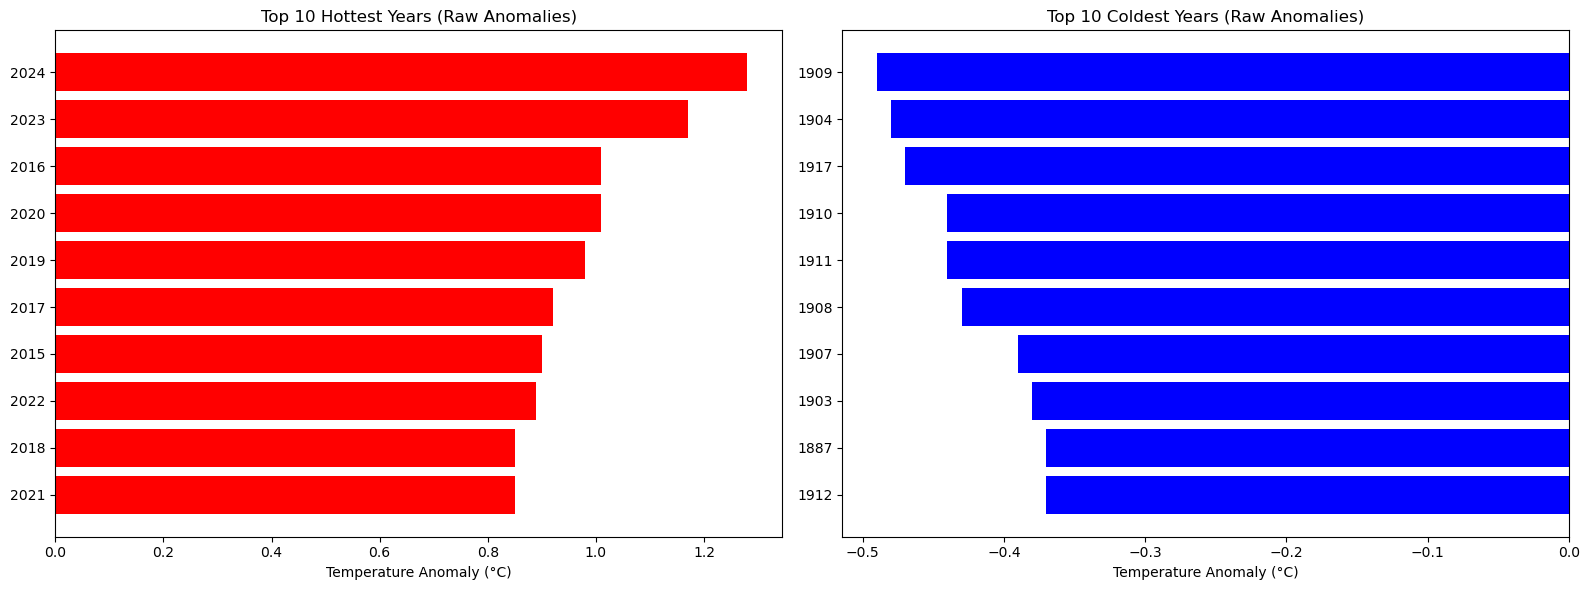

             Year  No_Smoothing
Hottest 144  2024          1.28
        143  2023          1.17
        136  2016          1.01
        140  2020          1.01
        139  2019          0.98
        137  2017          0.92
        135  2015          0.90
        142  2022          0.89
        138  2018          0.85
        141  2021          0.85
Coldest 29   1909         -0.49
        24   1904         -0.48
        37   1917         -0.47
        30   1910         -0.44
        31   1911         -0.44
        28   1908         -0.43
        27   1907         -0.39
        23   1903         -0.38
        7    1887         -0.37
        32   1912         -0.37


In [19]:
# Extract top 10 warmest and coldest years
top_10_hottest = data.nlargest(10, 'No_Smoothing')[['Year', 'No_Smoothing']]
top_10_coldest = data.nsmallest(10, 'No_Smoothing')[['Year', 'No_Smoothing']]

# Plot them side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Hottest years
axs[0].barh(top_10_hottest['Year'].astype(str), top_10_hottest['No_Smoothing'], color='red')
axs[0].set_title('Top 10 Hottest Years (Raw Anomalies)')
axs[0].invert_yaxis()
axs[0].set_xlabel('Temperature Anomaly (°C)')

# Coldest years
axs[1].barh(top_10_coldest['Year'].astype(str), top_10_coldest['No_Smoothing'], color='blue')
axs[1].set_title('Top 10 Coldest Years (Raw Anomalies)')
axs[1].invert_yaxis()
axs[1].set_xlabel('Temperature Anomaly (°C)')

plt.tight_layout()
plt.show()

# Combine and print the tables
combined_df = pd.concat([top_10_hottest, top_10_coldest], keys=["Hottest", "Coldest"])
print(combined_df)


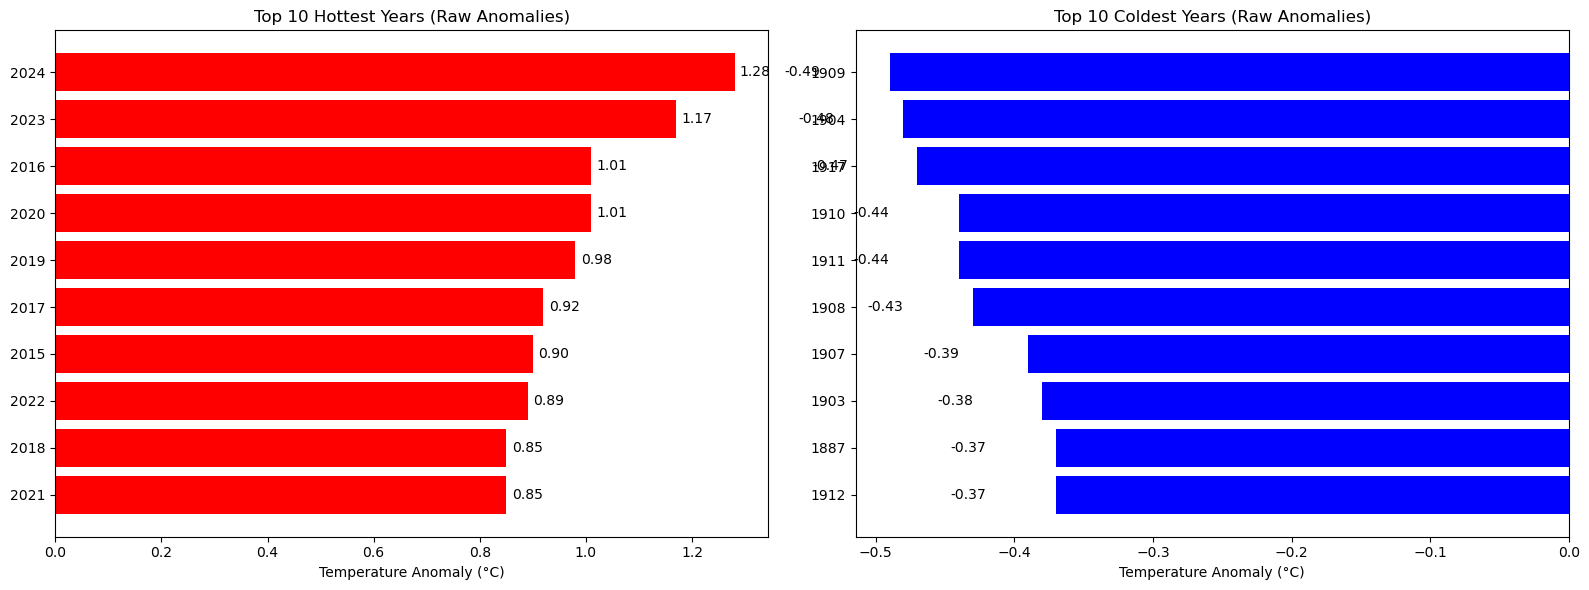

In [20]:
# Create a new figure with horizontal bar charts for hottest and coldest years
"""Creates a figure (fig) with 2 horizontal subplots (axs[0] and axs[1]) in 1 row
figsize=(16, 6) makes it wide enough for readability"""
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Hottest years
"""barh() creates a horizontal bar chart of the 10 hottest years
The y-axis is the year (as string for nice labels)
The x-axis is the temperature anomaly
Bars are red for heat
axs[0] - top 10 hottest years"""
axs[0].barh(top_10_hottest['Year'].astype(str), top_10_hottest['No_Smoothing'], color='red')

"""Sets the title, flips the y-axis so hottest year is on top, and labels the x-axis"""
axs[0].set_title('Top 10 Hottest Years (Raw Anomalies)')
axs[0].invert_yaxis()
axs[0].set_xlabel('Temperature Anomaly (°C)')

"""Loop through each of the 10 hotttest years,
i is the index (0-9),
temp is the temperature anomaly for that year,
Adds a text label to each bar with the temperature value (like +1.28°C) next to the corresponding bar/point in axs[0],;
f"{temp:.2f}" - tells the Python to format the string; inserts the value in temp;
:.2f - : starts formatting; .2 - show 2 decimal places; f - format as fixed-point (i.e. decimal) number,
temp + 0.01 - temp is the lenght of the bar; i is the vertical position; places the x-coordinate of the label slighly to the right end of the bar,
va='center' aligns the text vertically center to the point,
Positioned just right of the bar for readability
Horizontal alignment defaults to 'left', so it aligns clearly next to the bar"""
for i, (year, temp) in enumerate(zip(top_10_hottest['Year'], top_10_hottest['No_Smoothing'])):
    axs[0].text(temp + 0.01, i, f"{temp:.2f}", va='center')

# Coldest years
"""axs[1] - top 10 coldest years"""
axs[1].barh(top_10_coldest['Year'].astype(str), top_10_coldest['No_Smoothing'], color='blue')
axs[1].set_title('Top 10 Coldest Years (Raw Anomalies)')
axs[1].invert_yaxis()
axs[1].set_xlabel('Temperature Anomaly (°C)')
for i, (year, temp) in enumerate(zip(top_10_coldest['Year'], top_10_coldest['No_Smoothing'])):
    axs[1].text(temp - 0.05, i, f"{temp:.2f}", va='center', ha='right') #ha='right' aligns the text to the right of the text box

plt.tight_layout()
plt.show()


### NOTE

### For the **Hottest Years**:
```python
for i, (year, temp) in enumerate(zip(top_10_hottest['Year'], top_10_hottest['No_Smoothing'])):
    axs[0].text(temp + 0.01, i, f"{temp:.2f}", va='center')
```

- `axs[0]` -- Targets the first (left) subplot.
- `.text(temp + 0.01, i, f"{temp:.2f}")` → Adds a label **next to each bar**, slightly to the right (`+ 0.01`), with 2 decimal places.
- `va='center'` → Vertically centers the label.

---

### For the **Coldest Years**:
```python
for i, (year, temp) in enumerate(zip(top_10_coldest['Year'], top_10_coldest['No_Smoothing'])):
    axs[1].text(temp - 0.05, i, f"{temp:.2f}", va='center', ha='right')
```

- `axs[1]` -- Targets the second (right) subplot.
- `.text(temp - 0.05, i, ...)` → Shifts the label **leftward**, so it doesn't overlap with the bar.
- `ha='right'` → Aligns the text to the **right**, so it hugs the bar edge neatly.

---


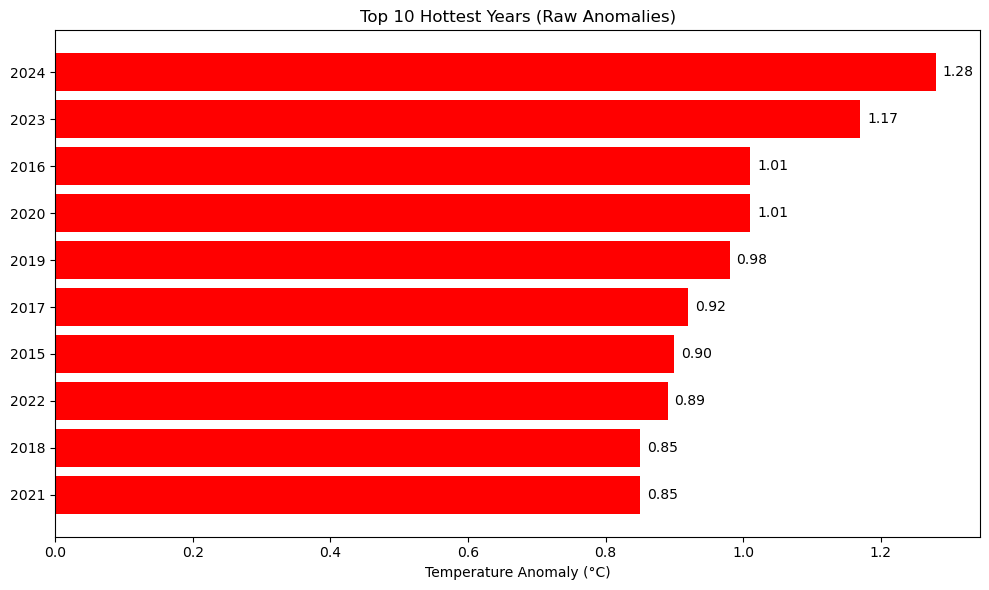

In [22]:
# Hottest
# Plot for the Top 10 Hottest Years only
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_hottest['Year'].astype(str), top_10_hottest['No_Smoothing'], color='red')
plt.title('Top 10 Hottest Years (Raw Anomalies)')
plt.xlabel('Temperature Anomaly (°C)')
plt.gca().invert_yaxis()

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f"{width:.2f}", va='center')

plt.tight_layout()
plt.show()


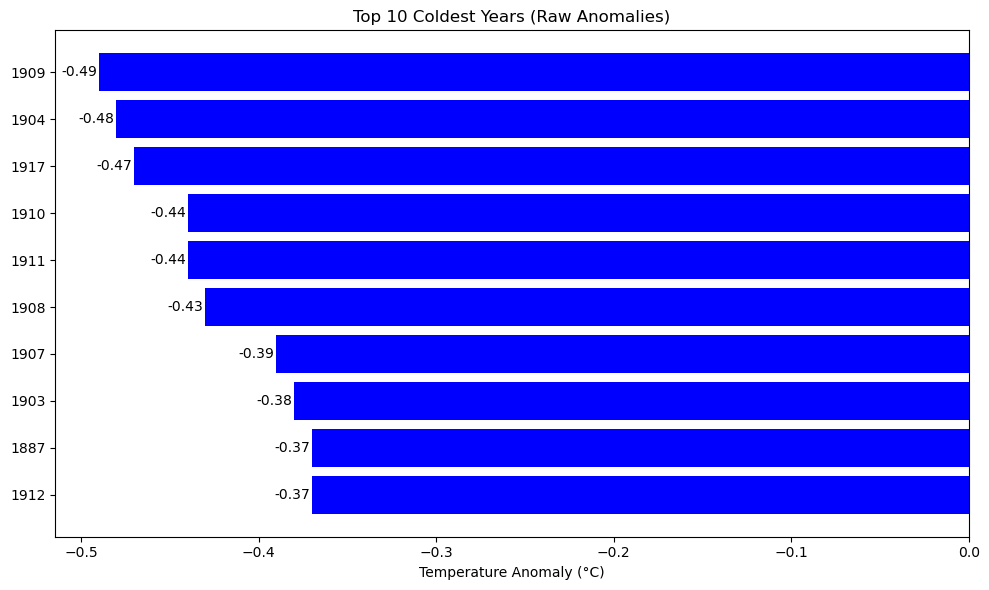

In [23]:

# Coldest years
# Plot for the Top 10 Coldest Years only
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_coldest['Year'].astype(str), top_10_coldest['No_Smoothing'], color='blue')
plt.title('Top 10 Coldest Years (Raw Anomalies)')
plt.xlabel('Temperature Anomaly (°C)')
plt.gca().invert_yaxis()

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.001, bar.get_y() + bar.get_height() / 2, f"{width:.2f}", va='center', ha='right')

plt.tight_layout()
plt.show()


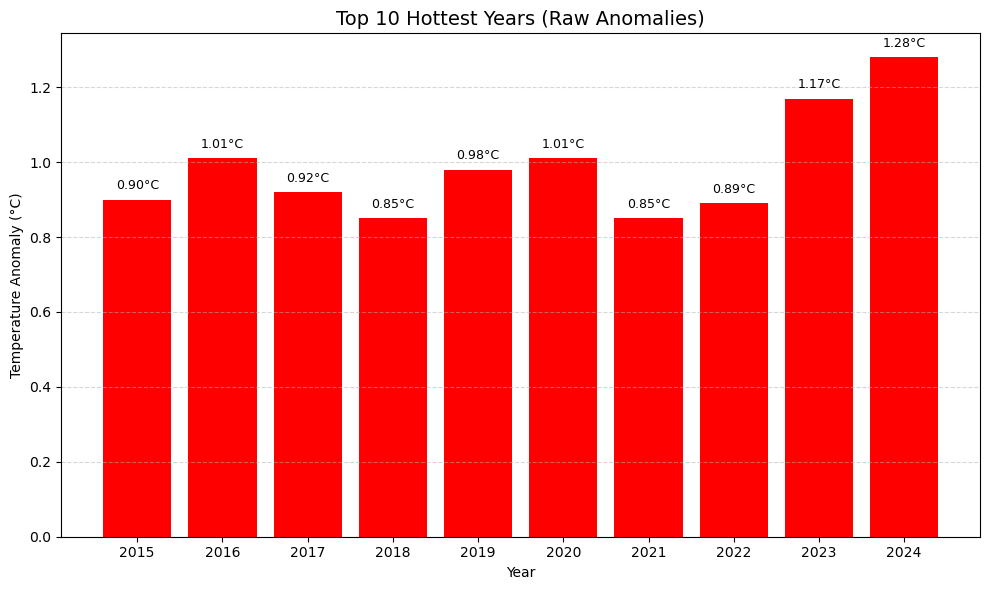

In [25]:
import matplotlib.pyplot as plt

# Sample top 10 hottest years (replace with your actual sorted DataFrame)
top_hottest = data.sort_values(by='No_Smoothing', ascending=False).head(10).sort_values(by='Year')

plt.figure(figsize=(10, 6))
plt.bar(top_hottest['Year'].astype(str), top_hottest['No_Smoothing'], color='red')

# Add text annotations on top of bars
for i, (year, value) in enumerate(zip(top_hottest['Year'], top_hottest['No_Smoothing'])):
    plt.text(i, value + 0.02, f'{value:.2f}°C', ha='center', va='bottom', fontsize=9)

plt.title("Top 10 Hottest Years (Raw Anomalies)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


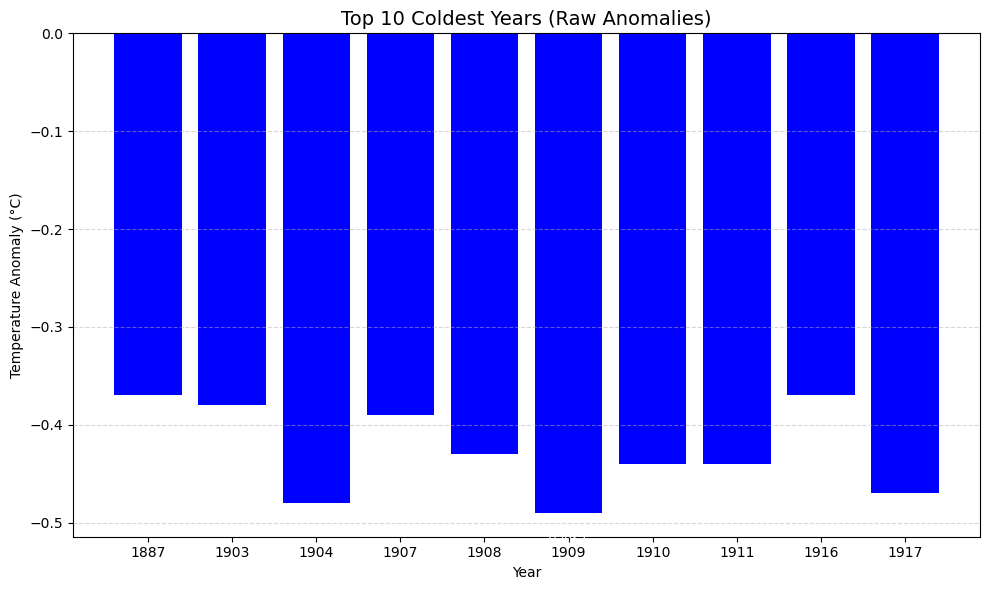

In [45]:
import matplotlib.pyplot as plt

# Sort coldest years in chronological order (optional, for better timeline reading)
top_coldest = data.sort_values(by='No_Smoothing').head(10).sort_values(by='Year')

plt.figure(figsize=(10, 6))
plt.bar(top_coldest['Year'].astype(str), top_coldest['No_Smoothing'], color='blue')

# Add labels on top of each bar
for i, (year, value) in enumerate(zip(top_coldest['Year'], top_coldest['No_Smoothing'])):
    plt.text(i, value - 0.02, f'{value:.2f}°C', ha='center', va='top', fontsize=9, color='white')

plt.title("Top 10 Coldest Years (Raw Anomalies)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


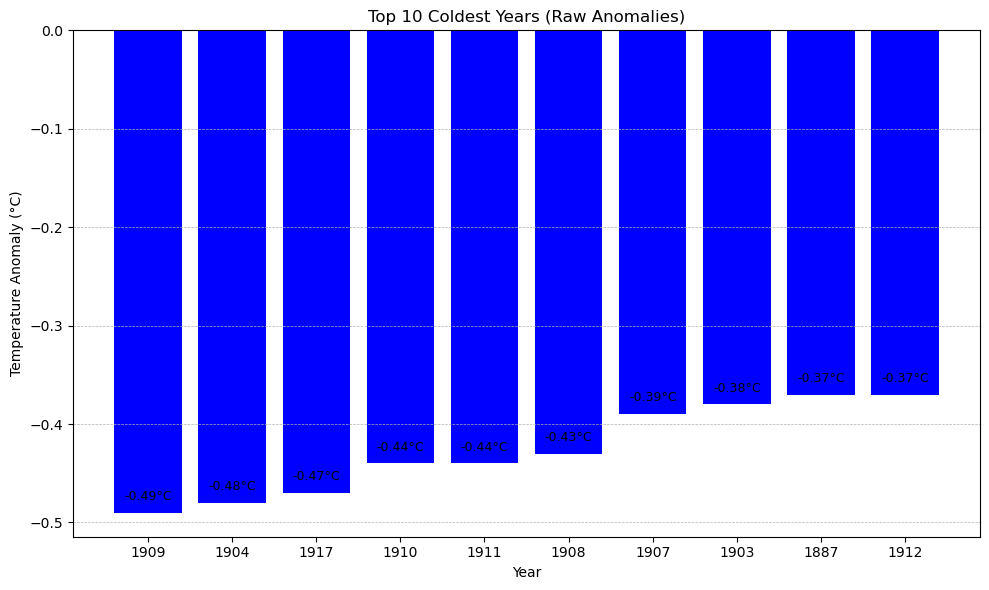

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Coldest years data (manually input based on earlier outputs)
coldest_years = {
    'Year': [1909, 1904, 1917, 1910, 1911, 1908, 1907, 1903, 1887, 1912],
    'Anomaly': [-0.49, -0.48, -0.47, -0.44, -0.44, -0.43, -0.39, -0.38, -0.37, -0.37]
}
cold_df = pd.DataFrame(coldest_years)

# Plot vertical bar chart with labels
plt.figure(figsize=(10, 6))
bars = plt.bar(cold_df['Year'].astype(str), cold_df['Anomaly'], color='blue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}°C',
             ha='center', va='bottom', fontsize=9, color='black')

plt.title("Top 10 Coldest Years (Raw Anomalies)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


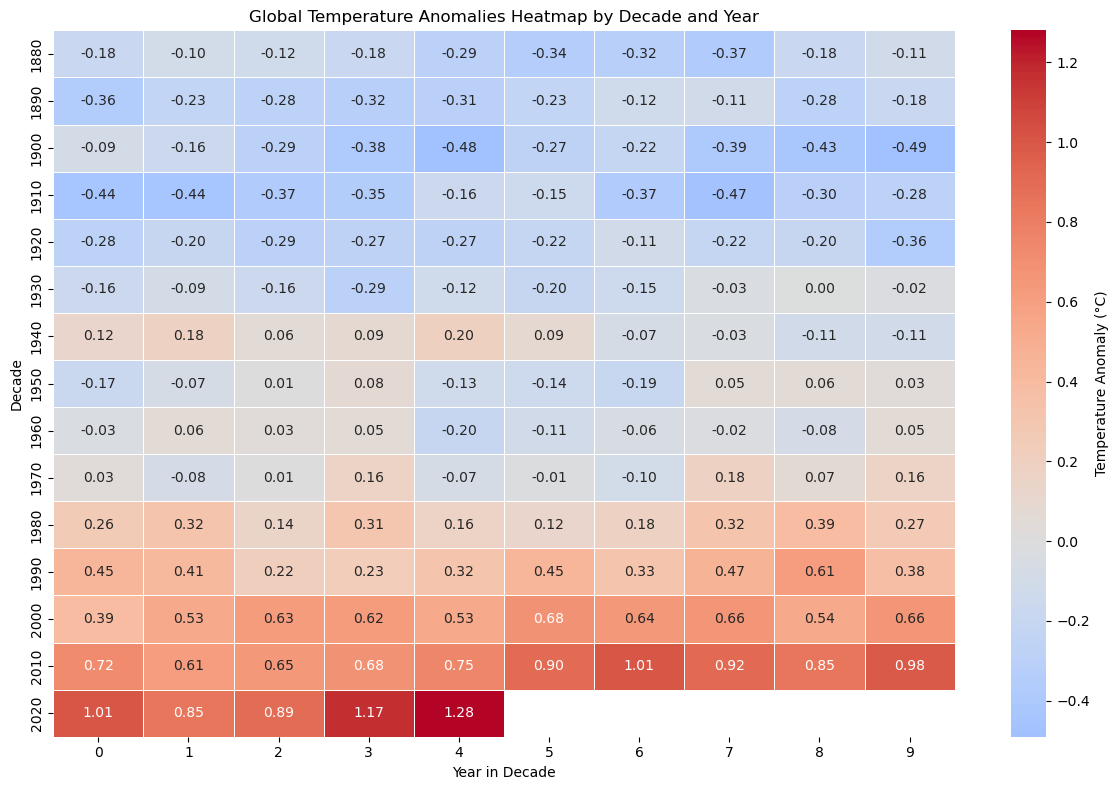

In [53]:
import seaborn as sns
import numpy as np

# Create a heatmap structure: rows as decades, columns as years within each decade
"""    Year_in_Decade: gets the last digit of the year (e.g., 1974 → 4)
       Decade: rounds the year down to the nearest decade (e.g., 1974 → 1970)
       This helps us group and organize the heatmap as a decade-by-year grid."""
data['Year_in_Decade'] = data['Year'] % 10
data['Decade'] = (data['Year'] // 10) * 10

# Pivot the table for heatmap (Decade as rows, Year_in_Decade as columns)
""" Creates a matrix where:
    Rows = Decades (1970, 1980, etc.)
    Columns = 0 to 9 (years in that decade)
    Cells = temperature anomaly from the No_Smoothing column"""
heatmap_data = data.pivot(index='Decade', columns='Year_in_Decade', values='No_Smoothing')

# Sort the index and columns to ensure proper layout
""" Just makes sure:
    Decades (rows) and years (columns) are in correct order numerically"""
heatmap_data = heatmap_data.sort_index().sort_index(axis=1)

# Plot the heatmap
"""coolwarm: blue (cool) - white (neutral) - red (warm)
   annot=True: shows each temperature number in its cell"""
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', center=0, annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Temperature Anomaly (°C)'})
plt.title("Global Temperature Anomalies Heatmap by Decade and Year")
plt.xlabel("Year in Decade")
plt.ylabel("Decade")
plt.tight_layout()
plt.show()


 **Global Temperature Anomalies Heatmap** from 1880 to 2024:

### Interpretatin:
- **Rows = Decades** (e.g., 1900s, 2000s)
- **Columns = Year within each decade** (0 = 1900, 1 = 1901, ..., 9 = 1909)
- **Color = Temperature anomaly**  
  - BLUE - Cooler than average  
  - RED -  Warmer than average

### What It Shows:
- Early decades (1880s–1930s) are dominated by **cooler anomalies** (blue).
- Starting in the **1980s**, we see a clear shift to **warming** (orange to deep red).
- The **2020s** stand out as the hottest so far, with 2024 hitting **+1.28°C**.


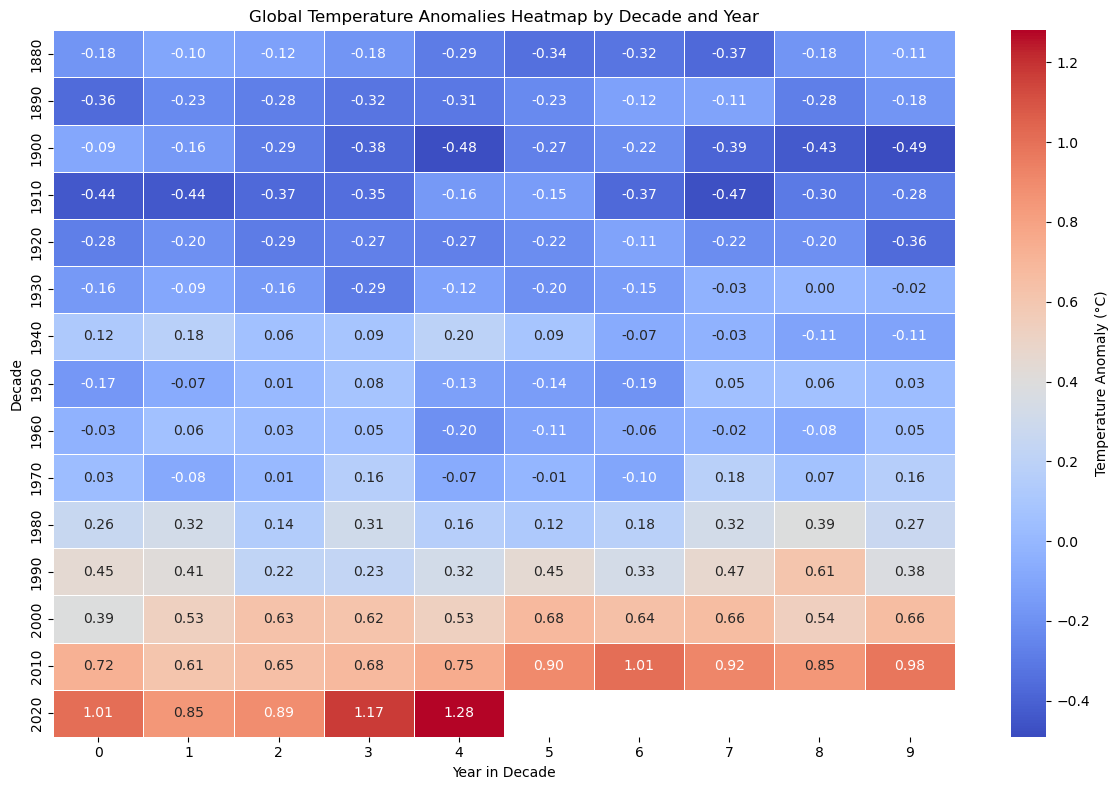

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#  Create "Year in Decade" and "Decade" columns
data['Year_in_Decade'] = data['Year'] % 10
data['Decade'] = (data['Year'] // 10) * 10

#  Pivot table to format as decade vs. year-in-decade matrix ---
heatmap_data = data.pivot(index='Decade', columns='Year_in_Decade', values='No_Smoothing')

#  Sort for proper layout
heatmap_data = heatmap_data.sort_index().sort_index(axis=1)

#  Set vmin and vmax 
"""to define the range of data values that the colormpa like coolwarm will map to colors in a plot.
Good if comparing multiple visualizations like cliamtte stripe and heatmap. 
It will automatially scales based on the data in the current plot only."""
vmin = data['No_Smoothing'].min()
vmax = data['No_Smoothing'].max()

#  Plot heatmap using consistent color normalization 
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap='coolwarm',
    vmin=vmin,
    vmax=vmax,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Temperature Anomaly (°C)'}
)
plt.title("Global Temperature Anomalies Heatmap by Decade and Year")
plt.xlabel("Year in Decade")
plt.ylabel("Decade")
plt.tight_layout()
plt.show()


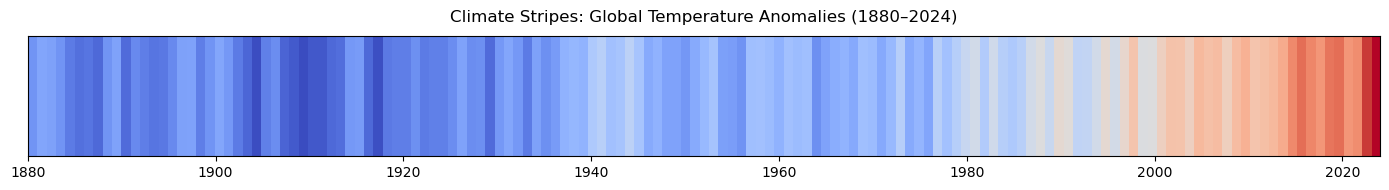

In [56]:
# Create Climate Stripes Visualization
"""Creates a wide and short figure (like a stripe).
14 units wide, 2 units tall — perfect for horizontal stripes."""
plt.figure(figsize=(14, 2))

""" Normalizes the temperature anomaly values to a range from 0 to 1.
    This is done by subtracting the min and dividing by the range.
    Then passes these normalized values to plt.cm.coolwarm, which maps them to colors:
        Blue = colder
        White = neutral
        Red = warmer
This creates a list of color values — one color per year — based on temperature anomaly."""
colors = plt.cm.coolwarm((data['No_Smoothing'] - data['No_Smoothing'].min()) / 
                         (data['No_Smoothing'].max() - data['No_Smoothing'].min()))


"""    imshow is used to display the color stripes as a single horizontal band.
       [colors] wraps the list into a 2D array (needed for imshow).
       aspect='auto' stretches the stripes horizontally.
       extent=[start_year, end_year, 0, 1] makes the x-axis match actual years.
Result: one horizontal line, each pixel a different year’s color."""

plt.imshow([colors], aspect='auto', extent=[data['Year'].min(), data['Year'].max(), 0, 1])
plt.xticks(np.arange(1880, 2030, 20)) #shows ticks every 20 years in the x-axis
plt.yticks([])  #y-axis ticks are hidden since it is just one row of color
plt.title('Climate Stripes: Global Temperature Anomalies (1880–2024)', pad=10)
plt.tight_layout() #optimizes spacing
plt.show()

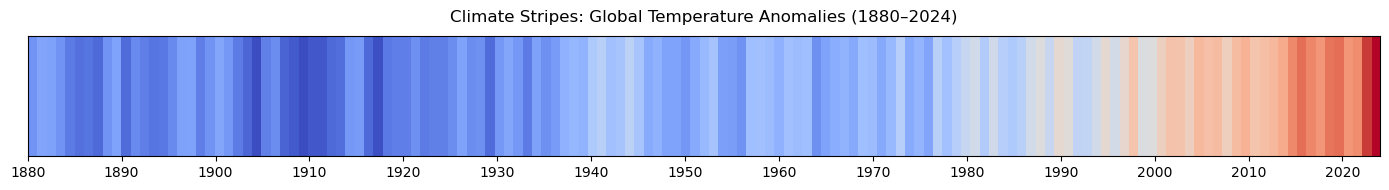

In [57]:
# Create Climate Stripes Visualization
plt.figure(figsize=(14, 2))
colors = plt.cm.coolwarm((data['No_Smoothing'] - data['No_Smoothing'].min()) / 
                         (data['No_Smoothing'].max() - data['No_Smoothing'].min()))
plt.imshow([colors], aspect='auto', extent=[data['Year'].min(), data['Year'].max(), 0, 1])
plt.xticks(np.arange(1880, 2030, 10))
plt.yticks([])
plt.title('Climate Stripes: Global Temperature Anomalies (1880–2024)', pad=10)
plt.tight_layout()
plt.show()


# LINEAR AGRESSION ANALYSIS

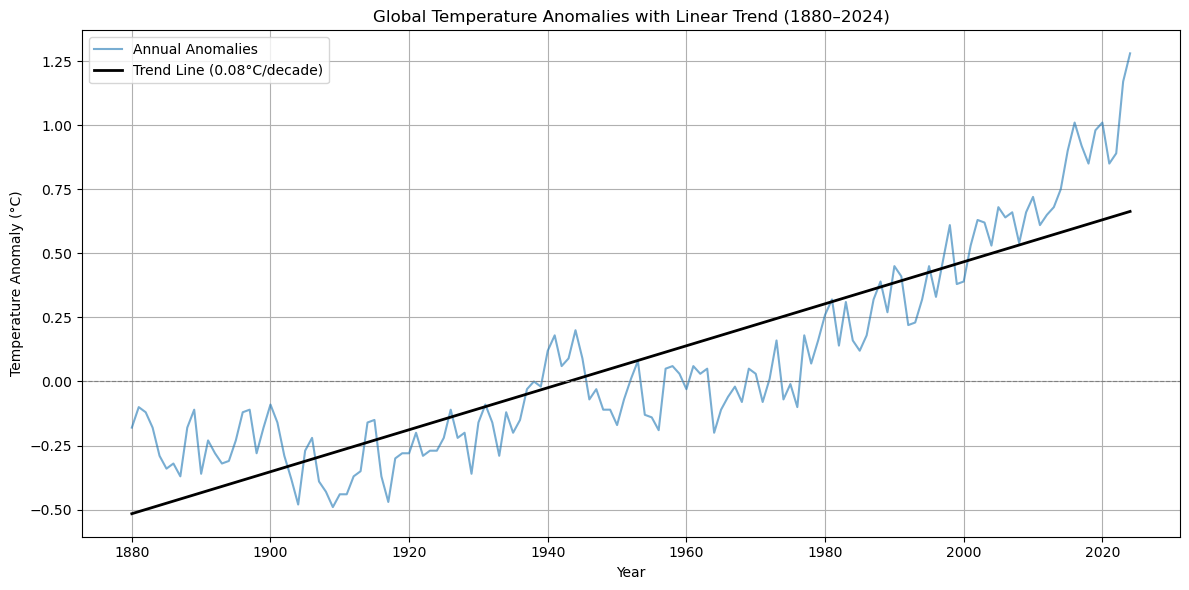

In [59]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for linear regression
X = data[['Year']]
y = data['No_Smoothing'] #target values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

#Behind the scenes it finds
#Anomaly = a x Year + b   

"""Where a is the slope(how much anomaly increases per year)
and b is the y-intercept(what anomaly would be at Year=0)"""

# Calculate warming rate per decade
warming_rate_per_decade = model.coef_[0] * 10

# Plot with regression line
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['No_Smoothing'], label='Annual Anomalies', alpha=0.6)
plt.plot(data['Year'], trend, color='black', linewidth=2, label=f'Trend Line ({warming_rate_per_decade:.2f}°C/decade)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Global Temperature Anomalies with Linear Trend (1880–2024)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


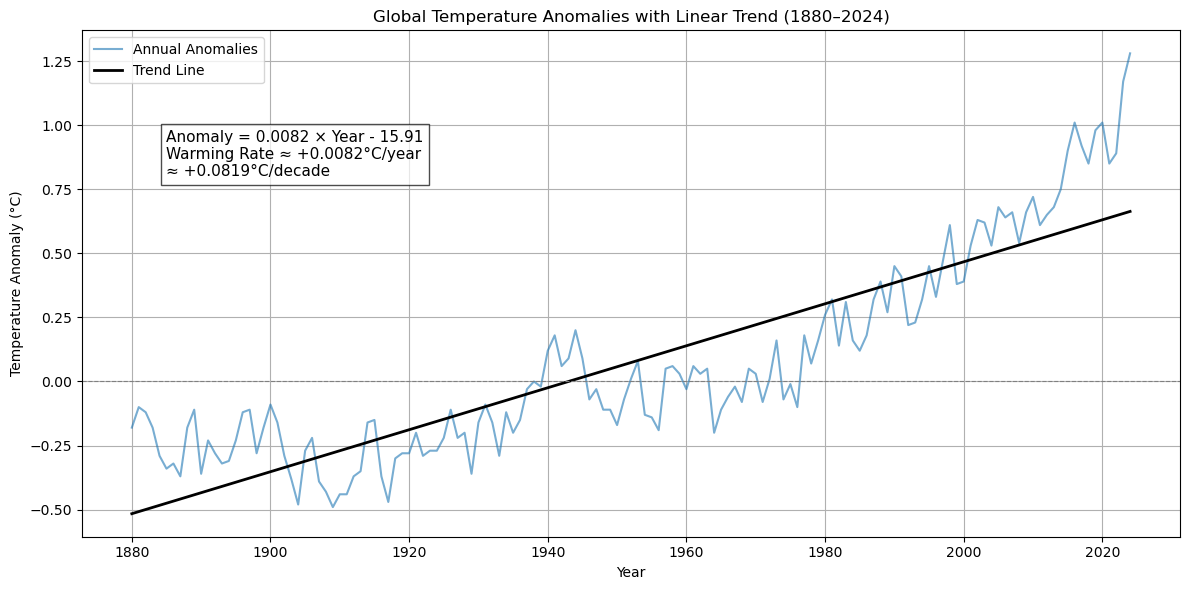

In [68]:
# Re-plot the regression chart with equation and rate annotated on the graph
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['No_Smoothing'], label='Annual Anomalies', alpha=0.6)
plt.plot(data['Year'], trend, color='black', linewidth=2, label='Trend Line')

# Add regression equation and warming rate as text on the plot
equation_text = f"Anomaly = 0.0082 × Year - 15.91\nWarming Rate ≈ +0.0082°C/year\n≈ +0.0819°C/decade"
plt.text(1885, 0.8, equation_text, fontsize=11, bbox=dict(facecolor='white', alpha=0.7))

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Global Temperature Anomalies with Linear Trend (1880–2024)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

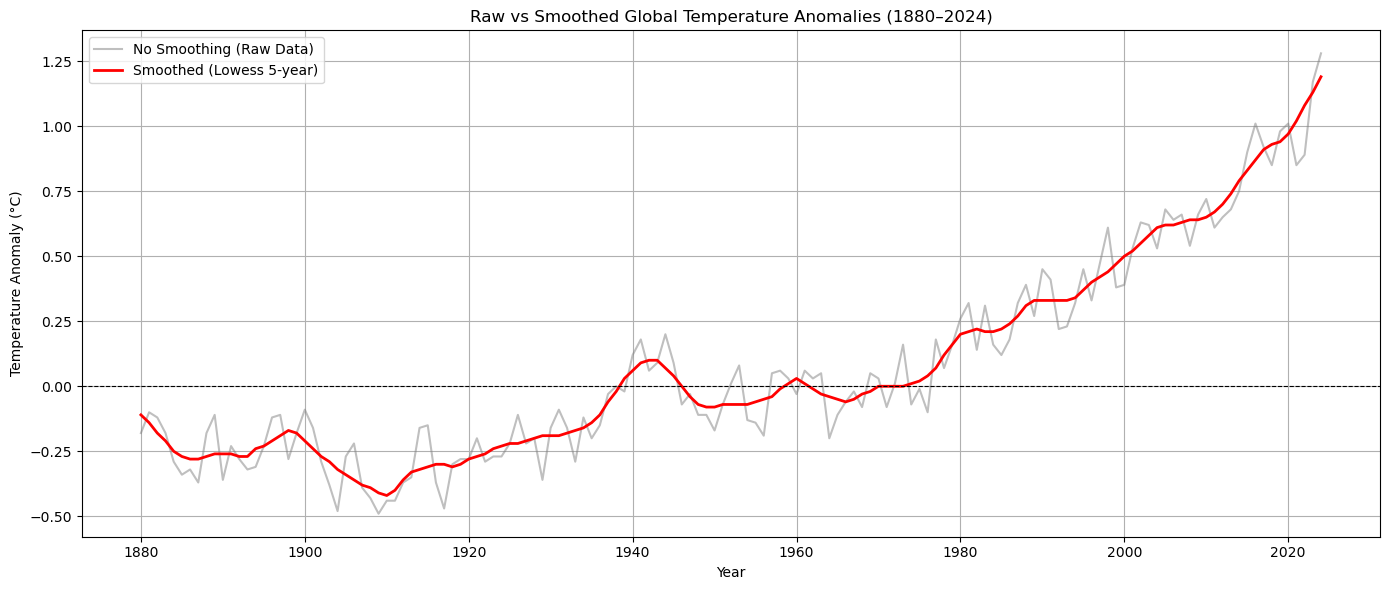

In [69]:
# Plot to compare No Smoothing vs Lowess(5) smoothing
plt.figure(figsize=(14, 6))
plt.plot(data['Year'], data['No_Smoothing'], label='No Smoothing (Raw Data)', color='gray', alpha=0.5)
plt.plot(data['Year'], data['Lowess5'], label='Smoothed (Lowess 5-year)', color='red', linewidth=2)

plt.title('Raw vs Smoothed Global Temperature Anomalies (1880–2024)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

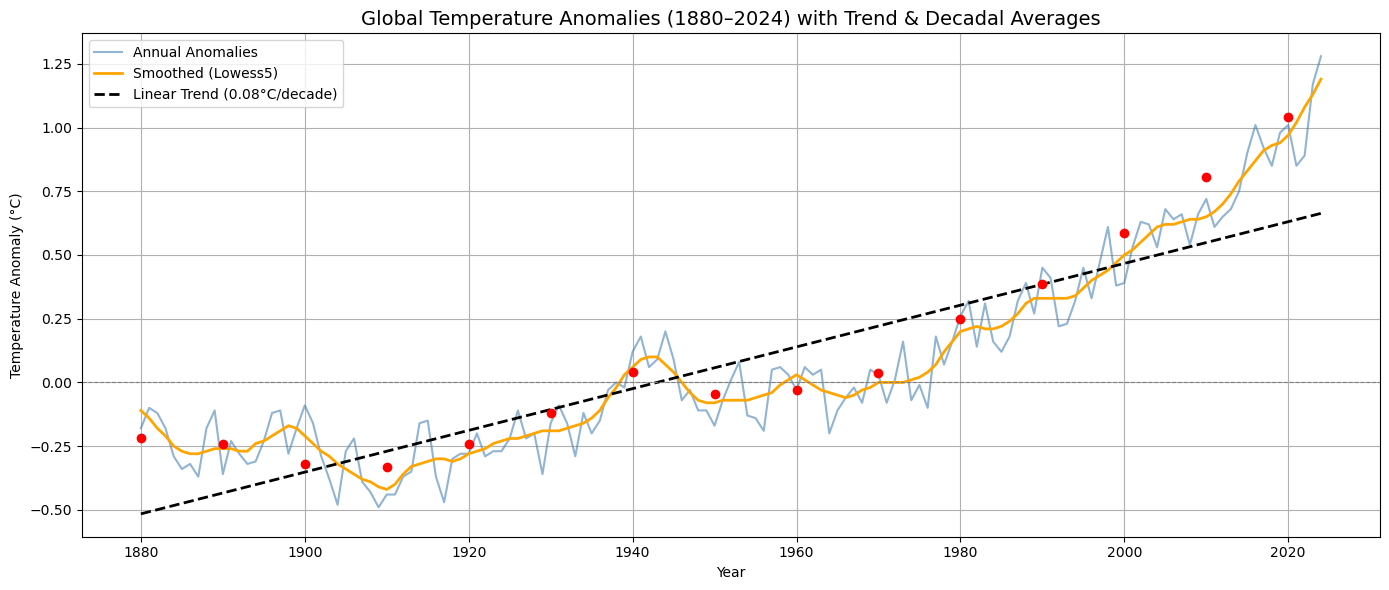

In [46]:
# Recreate the previous linear regression + add Lowess and Decadal plots

# Prepare data
X = data[['Year']]
y = data['No_Smoothing']

# Fit linear regression
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
warming_rate_per_decade = model.coef_[0] * 10

# Create decade column and calculate decadal averages
data['Decade'] = (data['Year'] // 10) * 10
decadal_avg = data.groupby('Decade')['No_Smoothing'].mean().reset_index()

plt.figure(figsize=(14, 6))

# Plot raw data and lowess
plt.plot(data['Year'], data['No_Smoothing'], label='Annual Anomalies', alpha=0.6, color='steelblue')
plt.plot(data['Year'], data['Lowess5'], label='Smoothed (Lowess5)', color='orange', linewidth=2)

# Plot linear regression as a clearly straight line (replacing trend curve for clarity)
plt.plot(data['Year'], trend, color='black', linewidth=2, linestyle='--',
         label=f'Linear Trend ({warming_rate_per_decade:.2f}°C/decade)')

# Add red decadal average points
for _, row in decadal_avg.iterrows():
    plt.scatter(row['Decade'], row['No_Smoothing'], color='red', zorder=5)

# Styling
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Global Temperature Anomalies (1880–2024) with Trend & Decadal Averages', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


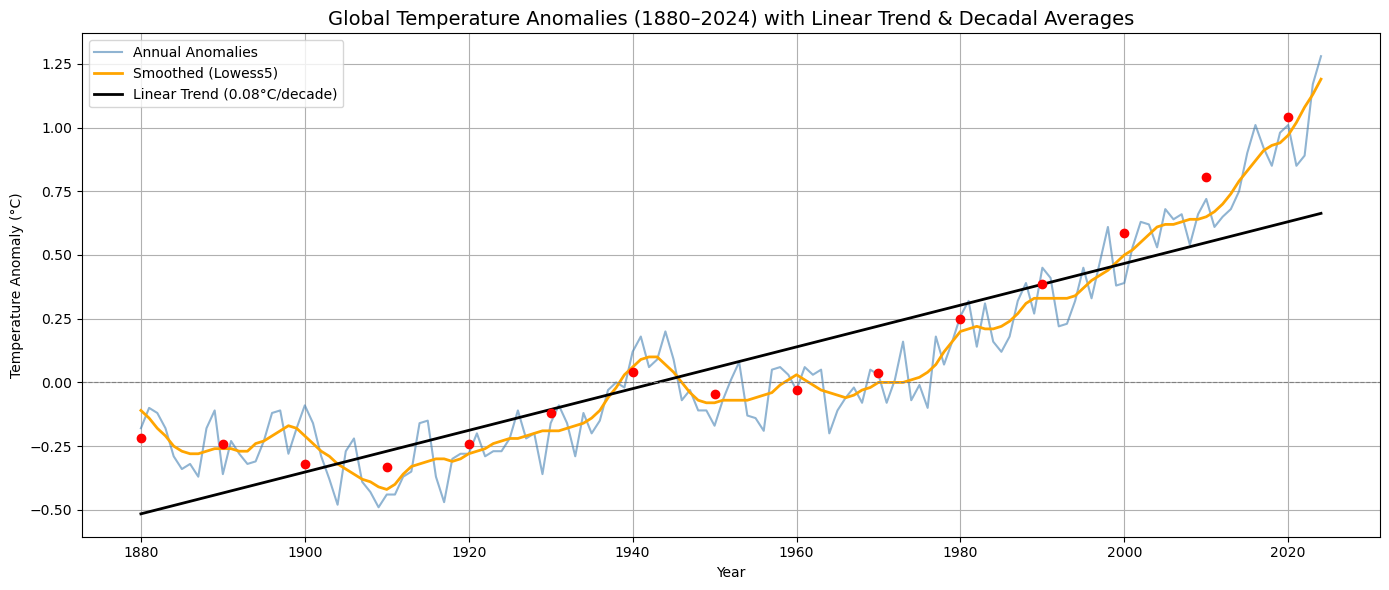

Model Coefficient (Slope): 0.00819 °C/year
Average Warming Rate: 0.08 °C/decade

According to the linear regression model fitted to NASA's global temperature anomaly data from 1880 to 2024,
the Earth's surface temperature has been warming at an average rate of approximately 0.08°C per decade.


In [65]:
# Re-plot the chart with a solid straight line for linear regression instead of dashed
plt.figure(figsize=(14, 6))

# Plot raw anomalies and smoothed trend
plt.plot(data['Year'], data['No_Smoothing'], label='Annual Anomalies', alpha=0.6, color='steelblue')
plt.plot(data['Year'], data['Lowess5'], label='Smoothed (Lowess5)', color='orange', linewidth=2)

# Plot linear regression as a solid straight line
plt.plot(data['Year'], trend, color='black', linewidth=2, label=f'Linear Trend ({warming_rate_per_decade:.2f}°C/decade)')

# Add red decadal average points
for _, row in decadal_avg.iterrows():
    plt.scatter(row['Decade'], row['No_Smoothing'], color='red', zorder=5)

# Styling
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Global Temperature Anomalies (1880–2024) with Linear Trend & Decadal Averages', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Extract the slope (warming rate per year) from the linear model
slope_per_year = model.coef_[0]

# Convert to warming rate per decade
warming_rate_per_decade = slope_per_year * 10

# Print the result with explanatory statement
print(f"Model Coefficient (Slope): {slope_per_year:.5f} °C/year")
print(f"Average Warming Rate: {warming_rate_per_decade:.2f} °C/decade")

# Statement for use in report or presentation
print(f"\nAccording to the linear regression model fitted to NASA's global temperature anomaly data from 1880 to 2024,")
print(f"the Earth's surface temperature has been warming at an average rate of approximately {warming_rate_per_decade:.2f}°C per decade.")



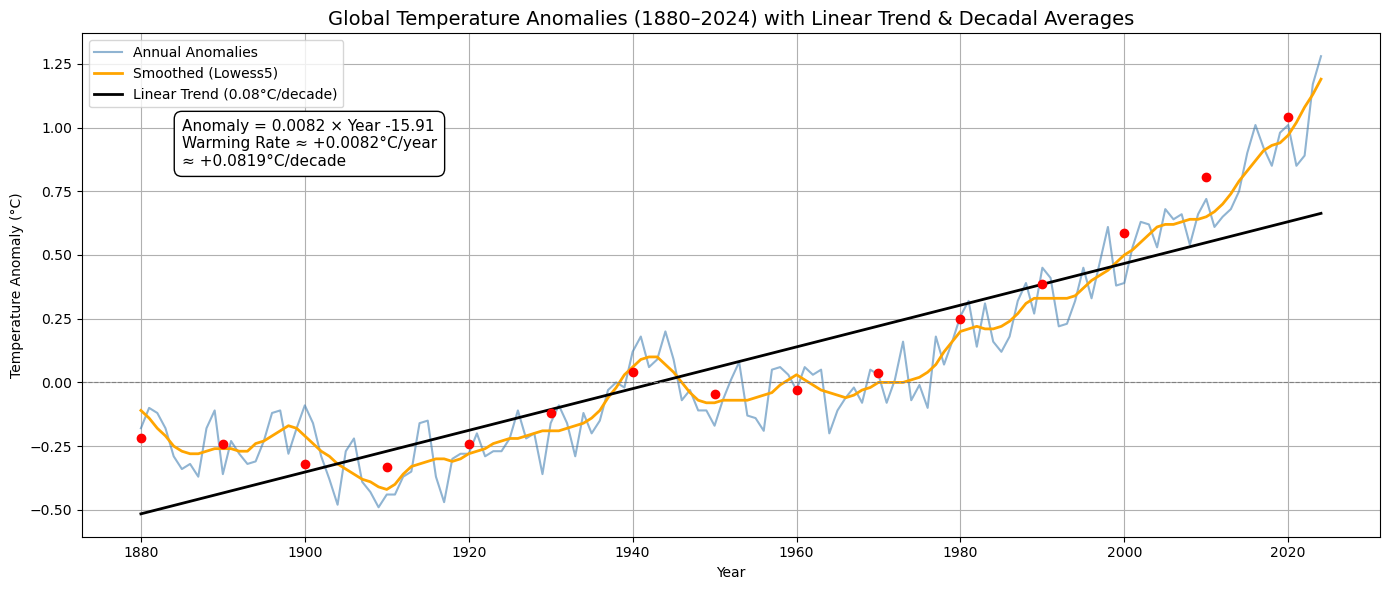

Model Coefficient (Slope): 0.00819 °C/year
Average Warming Rate: 0.08 °C/decade

According to the linear regression model fitted to NASA's global temperature anomaly data from 1880 to 2024,
the Earth's surface temperature has been warming at an average rate of approximately 0.08°C per decade.


In [71]:
import matplotlib.pyplot as plt

# plot the chart with a solid straight line for linear regression instead of dashed
plt.figure(figsize=(14, 6))

# Plot raw anomalies and smoothed trend
plt.plot(data['Year'], data['No_Smoothing'], label='Annual Anomalies', alpha=0.6, color='steelblue')
plt.plot(data['Year'], data['Lowess5'], label='Smoothed (Lowess5)', color='orange', linewidth=2)

# Plot linear regression as a solid straight line
plt.plot(data['Year'], trend, color='black', linewidth=2, label=f'Linear Trend ({warming_rate_per_decade:.2f}°C/decade)')

# Add red decadal average points
for _, row in decadal_avg.iterrows():
    plt.scatter(row['Decade'], row['No_Smoothing'], color='red', zorder=5)

# Add annotation box with warming equation
slope = model.coef_[0]
intercept = model.intercept_
warming_rate_decade = slope * 10

# Compose the annotation text
annotation = (
    f"Anomaly = {slope:.4f} × Year {intercept:+.2f}\n"
    f"Warming Rate ≈ {slope:+.4f}°C/year\n"
    f"≈ {warming_rate_decade:+.4f}°C/decade"
)

# Position the text inside the chart
plt.text(1885, 0.85, annotation,
         fontsize=11,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Styling
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Global Temperature Anomalies (1880–2024) with Linear Trend & Decadal Averages', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the result with explanatory statement
print(f"Model Coefficient (Slope): {slope_per_year:.5f} °C/year")
print(f"Average Warming Rate: {warming_rate_per_decade:.2f} °C/decade")


# Statement for use in report or presentation
print(f"\nAccording to the linear regression model fitted to NASA's global temperature anomaly data from 1880 to 2024,")
print(f"the Earth's surface temperature has been warming at an average rate of approximately {warming_rate_per_decade:.2f}°C per decade.")


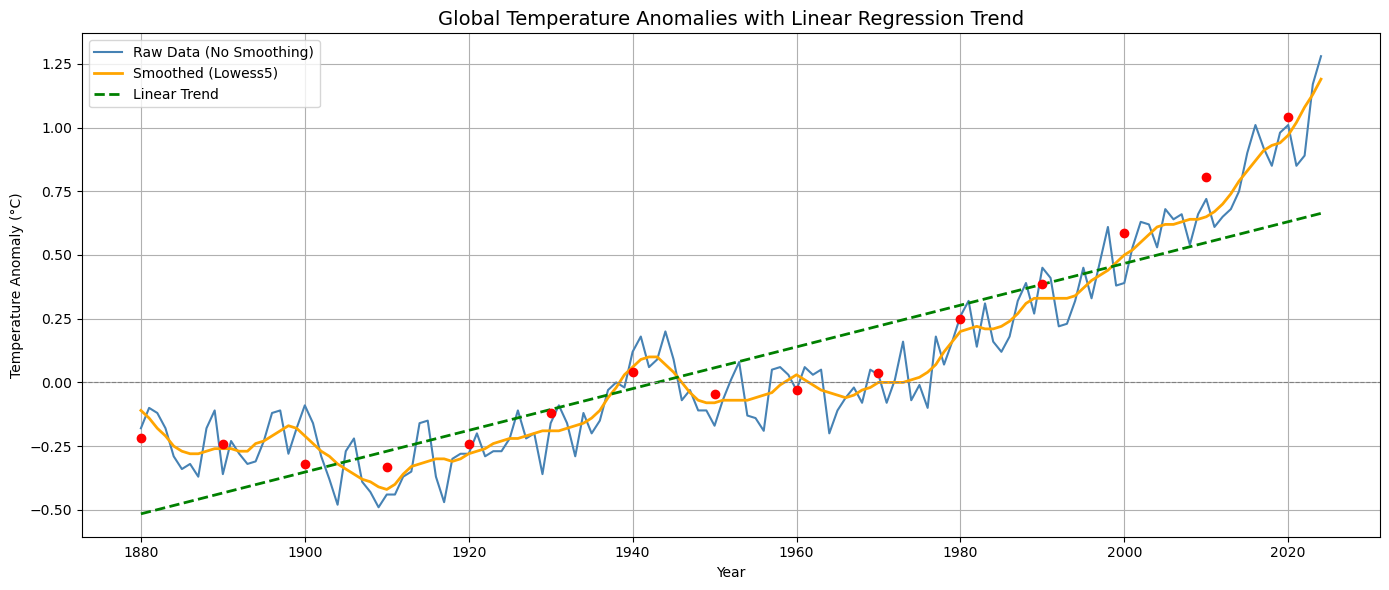

In [72]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for linear regression
X = data[['Year']]
y = data['No_Smoothing']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Add the predicted trend to the dataset
data['Trend'] = model.predict(X)

# Plot the chart with linear regression and decadal average points
plt.figure(figsize=(14, 6))
plt.plot(data['Year'], data['No_Smoothing'], label='Raw Data (No Smoothing)', color='steelblue')
plt.plot(data['Year'], data['Lowess5'], label='Smoothed (Lowess5)', color='orange', linewidth=2)
plt.plot(data['Year'], data['Trend'], label='Linear Trend', color='green', linestyle='--', linewidth=2)

# Highlight decadal averages with red dots (without text labels now)
for i, row in decadal_avg.iterrows():
    plt.scatter(row['Decade'], row['No_Smoothing'], color='red', zorder=5)

# Final plot styling
plt.title("Global Temperature Anomalies with Linear Regression Trend", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


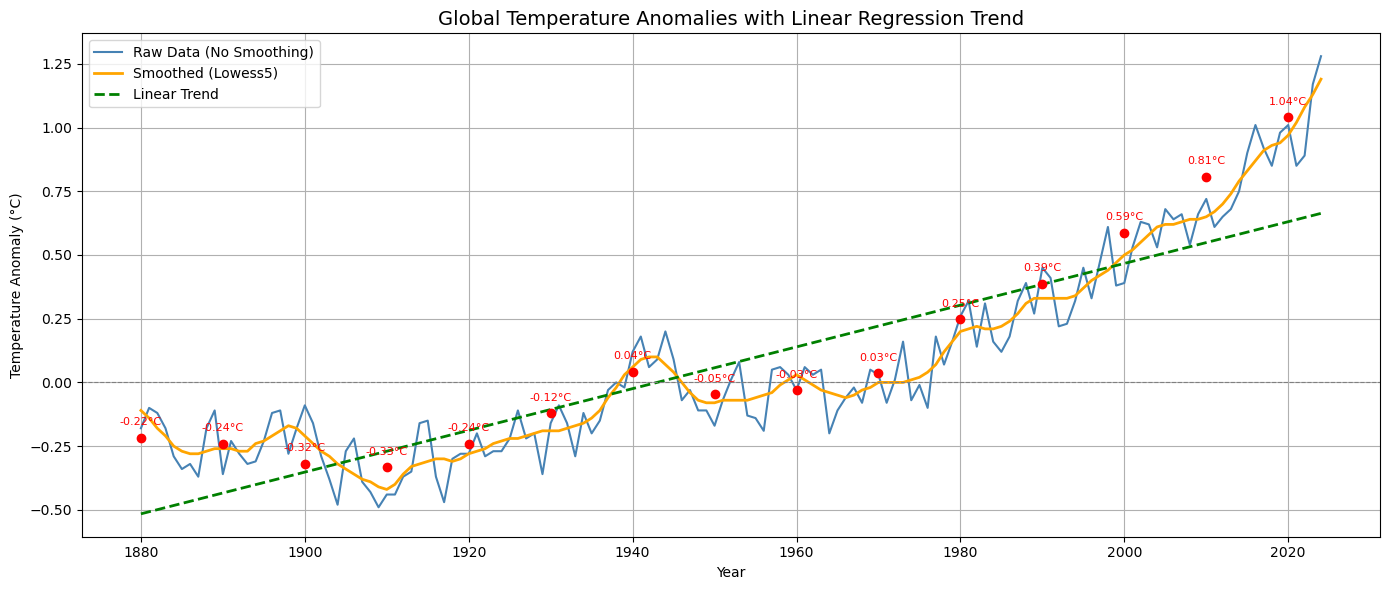

 Linear Trend: The Earth's surface temperature anomaly has increased by 0.0082°C per year on average.


In [79]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
X = data[['Year']]         # Feature (year)
y = data['No_Smoothing']   # Target values (temperature anomaly)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

"""Behind the scenes, it finds: Anomaly = a x Year + b
Where: a is the slope (how much anomaly increases per year)
and b is the y-intercept(what anomaly would be at Year=0)"""

# Predict values for plotting the regression line 
"""Once trained, the model can generate the predicted values(the green dashed line)"""
data['Trend'] = model.predict(X)

# Plot again with the regression line
"""Now, overlay the predicted trend line onto the existing chart"""
plt.figure(figsize=(14, 6))
plt.plot(data['Year'], data['No_Smoothing'], label='Raw Data (No Smoothing)', color='steelblue')
plt.plot(data['Year'], data['Lowess5'], label='Smoothed (Lowess5)', color='orange', linewidth=2)
plt.plot(data['Year'], data['Trend'], label='Linear Trend', color='green', linestyle='--', linewidth=2)

# Highlight decadal averages again
for i, row in decadal_avg.iterrows():
    plt.scatter(row['Decade'], row['No_Smoothing'], color='red', zorder=5)
    plt.text(row['Decade'], row['No_Smoothing'] + 0.05, f"{row['No_Smoothing']:.2f}°C", 
             ha='center', color='red', fontsize=8)

# Labels and layout
plt.title("Global Temperature Anomalies with Linear Regression Trend", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print the slope (rate of change per year)
slope = model.coef_[0]
print(f" Linear Trend: The Earth's surface temperature anomaly has increased by {slope:.4f}°C per year on average.")


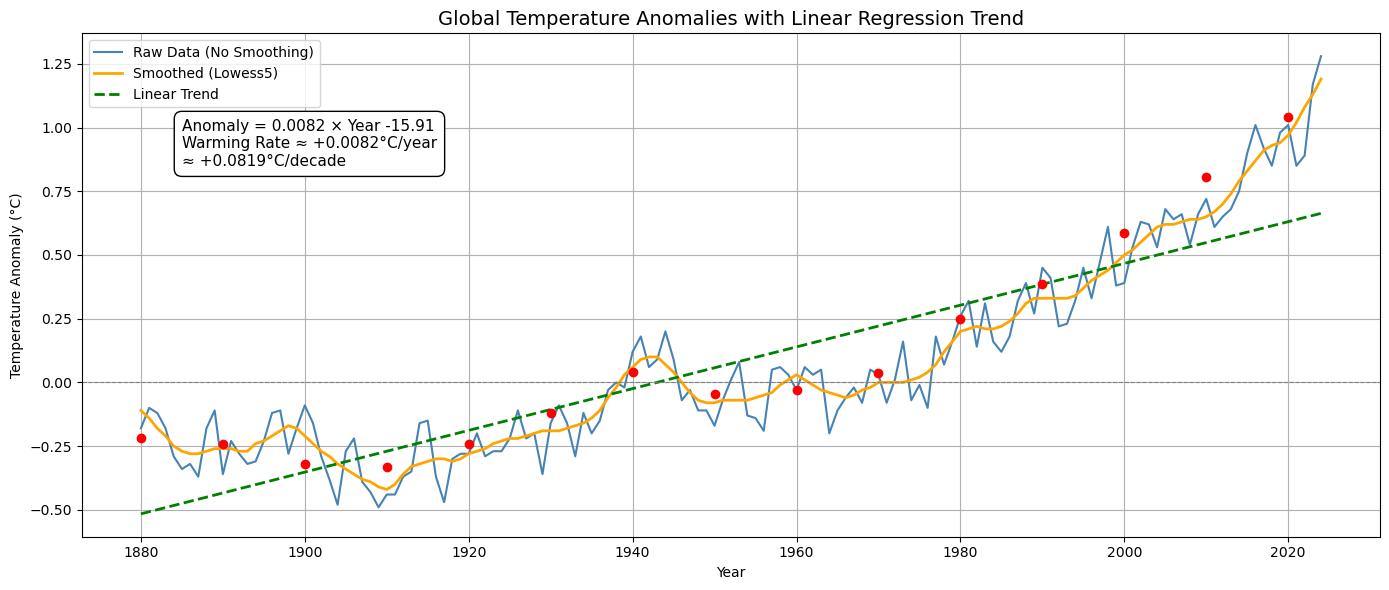

In [80]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for linear regression
X = data[['Year']]
y = data['No_Smoothing']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Add the predicted trend to the dataset
data['Trend'] = model.predict(X)

# Calculate warming stats
slope = model.coef_[0]
intercept = model.intercept_
warming_rate_decade = slope * 10

# Compose annotation text
annotation = (
    f"Anomaly = {slope:.4f} × Year {intercept:+.2f}\n"
    f"Warming Rate ≈ {slope:+.4f}°C/year\n"
    f"≈ {warming_rate_decade:+.4f}°C/decade"
)

# Plot the chart
plt.figure(figsize=(14, 6))
plt.plot(data['Year'], data['No_Smoothing'], label='Raw Data (No Smoothing)', color='steelblue')
plt.plot(data['Year'], data['Lowess5'], label='Smoothed (Lowess5)', color='orange', linewidth=2)
plt.plot(data['Year'], data['Trend'], label='Linear Trend', color='green', linestyle='--', linewidth=2)

# Highlight decadal averages with red dots
for i, row in decadal_avg.iterrows():
    plt.scatter(row['Decade'], row['No_Smoothing'], color='red', zorder=5)

# Add annotation box
plt.text(1885, 0.85, annotation,
         fontsize=11,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Final plot styling
plt.title("Global Temperature Anomalies with Linear Regression Trend", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# Extract the slope (warming rate per year) from the linear model
slope_per_year = model.coef_[0]

# Convert to warming rate per decade
warming_rate_per_decade = slope_per_year * 10

# Print the result with explanatory statement
print(f"Model Coefficient (Slope): {slope_per_year:.5f} °C/year")
print(f"Average Warming Rate: {warming_rate_per_decade:.2f} °C/decade")

# Statement for use in report or presentation
print(f"\nAccording to the linear regression model fitted to NASA's global temperature anomaly data from 1880 to 2024,")
print(f"the Earth's surface temperature has been warming at an average rate of approximately {warming_rate_per_decade:.2f}°C per decade.")


Model Coefficient (Slope): 0.00819 °C/year
Average Warming Rate: 0.08 °C/decade

According to the linear regression model fitted to NASA's global temperature anomaly data from 1880 to 2024,
the Earth's surface temperature has been warming at an average rate of approximately 0.08°C per decade.


 **Linear Regression Analysis** for global temperature change (1880–2024):

###  Insight:
- The **black line** is the linear trend.
- The warming rate is approximately **+0.0082°C per year**, or **+0.0819°C per decade** — a clear, quantifiable increase in global temperatures over time.





In [36]:
# Show the regression coefficient for warming rate calculation
coef_per_year = model.coef_[0]  # degrees Celsius per year
coef_per_decade = coef_per_year * 10  # degrees Celsius per decade

# Intercept and equation of the line
intercept = model.intercept_
regression_equation = f"Anomaly = {coef_per_year:.5f} * Year + {intercept:.2f}"

coef_per_year, coef_per_decade, regression_equation


(0.008188474256022673,
 0.08188474256022674,
 'Anomaly = 0.00819 * Year + -15.91')

### Linear Regression Calculation Explained:

To quantify the trend, we fit a regression line to the raw yearly temperature anomalies:

#### Regression Equation:
\[
\text{Anomaly} = 0.00819 \times \text{Year} - 15.91
\]

- **0.00819°C per year** → This is the **slope** of the line, showing how much the temperature anomaly increases each year on average.

---

### Convert to Decade:
To express the warming rate per decade:

\[
0.00819 \, \text{°C/year} \times 10 = \textbf{0.0819°C per decade}
\]

---

### Final Answer:
- **Warming Rate = +0.0082°C/year**
- **Warming Rate = +0.0819°C/decade**

This is a clear indicator of consistent long-term global warming.



In [40]:
# Pick sample years to manually compute the regression line points
sample_years = [1900, 1950, 2000, 2020, 2024]

# Use the regression equation: Anomaly = slope * year + intercept
manual_computations = {
    year: model.coef_[0] * year + model.intercept_ for year in sample_years
}

# Format results for display
manual_computations_df = pd.DataFrame(list(manual_computations.items()), columns=['Year', 'Predicted Anomaly (°C)'])
manual_computations_df


,Year,Predicted Anomaly (°C)
0,1900,-0.352008
1,1950,0.057416
2,2000,0.466840
3,2020,0.630609
4,2024,0.663363


Here’s the **manual computation** of temperature anomalies using the regression equation:

### Regression Formula:
\[
\text{Anomaly} = 0.0082 \times \text{Year} - 15.91
\]

### Sample Calculations:

| Year | Predicted Anomaly (°C) |
|------|------------------------|
| 1900 | –0.352°C |
| 1950 | +0.057°C |
| 2000 | +0.467°C |
| 2020 | +0.631°C |
| 2024 | +0.663°C |

These values are the actual Y-values that lie on the **regression line**. When plotted, they form the smooth black trend line you saw earlier.


visual comparison between **No Smoothing** (gray line) and **Smoothed (Lowess 5-year)** data (red line):

### Insights:
- The **gray line** shows the raw, wiggly yearly data — capturing all short-term noise.
- The **red line** smooths out those ups and downs to clearly reveal the long-term warming trend.
- We can still see major warming after the 1970s — but now it's easier to follow visually.



Updated chart with:

Raw temperature anomalies (steel blue)

Smoothed Lowess trend (orange)

Linear regression line (green, dashed)

Decadal average points (red dots)



---

## **How Did We Get the Line in the Regression Visual?**

The **black line** in the regression plot represents a **best-fit line** computed using **linear regression**, a statistical method that models the relationship between two variables:

- **X-axis:** Year  
- **Y-axis:** Temperature anomaly (°C)

---

## The Computation Behind It

We used this line formula:

\[
\text{Anomaly} = m \times \text{Year} + b
\]

Where:
- `m` is the **slope** of the line (how much the anomaly changes per year)
- `b` is the **intercept** (where the line crosses the Y-axis)

---

### Step-by-Step in Code:
```python
from sklearn.linear_model import LinearRegression

# X is the year column reshaped for sklearn
X = data[['Year']]  # Shape: (N, 1)
y = data['No_Smoothing']  # Temperature anomaly values

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Compute the line (predicted y values)
trend = model.predict(X)
```

---

### Result:

- **Slope (`m`) = 0.0082°C per year**
- **Intercept (`b`) = -15.91**
- So the equation becomes:

\[
\text{Anomaly} = 0.0082 \times \text{Year} - 15.91
\]

This line was then plotted directly on the graph:
```python
plt.plot(data['Year'], trend, color='black')
```

Each point on this line is a **computed value** from that equation using the corresponding year.



## EXPLANATION

---

## 1. **Raw vs Smoothed Global Temperature Anomalies (Line Plot)**

- The **blue line** is the **raw yearly data** (No Smoothing) — showing natural variability.
- The **orange line** is the **Lowess(5)** smoothed data — which reveals the long-term warming trend.

### Why it's important:
- Raw data shows short-term spikes/dips (e.g., volcanic eruptions, El Niño).
- Smoothed data reveals a **clear upward curve**, especially from 1980 onward.
- It visually proves that warming is not just about a few hot years — it's a **systematic trend**.

---

## 2. **Average Global Temperature Anomalies by Decade (Bar Chart)**

- Average anomalies grouped by decade.
- Transition from **cooler-than-normal decades** (blues, < 0°C) to **hotter ones** (> 0°C) — especially post-1980s.

### Why it matters:
- This bar chart shows that each decade since the 1980s has been **hotter than the last**.
- The **2020s** are already the warmest — and the decade isn’t even over.

---

## 3. **Top 10 Hottest Years (Horizontal Bar Chart)**

- All top 10 hottest years occurred in the **21st century**, especially post-2015.
- **2024** ranks as the hottest year on record with a **+1.28°C anomaly**.

### Insight:
- Global warming isn’t just long-term — it’s **accelerating**, and recent years are extreme outliers.

---

## 4. **Top 10 Coldest Years (Horizontal Bar Chart)**

- Coldest years are all **from the early 20th century** or before 1950.
- Coldest year: **1909**, with **–0.49°C anomaly**.

### Why it matters:
- Shows how rare cold years have become.
- The climate system has **shifted into a warmer state**.

---

## 5. **Global Temperature Anomalies Heatmap (Decade × Year)**

- Colors represent anomaly values from **cooler (blue)** to **hotter (red)**.
- Rows = **decades**, Columns = **year within that decade**

### Insgiht:
- A powerful visual of the shift from blues to reds over time.
- The **entire lower part** (recent decades) is deep red — unmistakable warming.

---

## 6. **Linear Trend Line on Anomaly Data**

- A **best-fit line** through the raw data using **linear regression**.
- Includes **calculated trend**:
  - Warming Rate ≈ **+0.0082°C/year**
  - ≈ **+0.0819°C/decade**

### Why it matters:
- This is **hard statistical evidence** of long-term climate warming.
- Quantifies the rate of change using data, not just visuals.

---

## 7. **Climate Stripes Visualization**


- Each stripe = one year from **1880 to 2024**
- Colors go from **cool blues** (early years) to **deep reds** (recent years)

### Why it matters:
- Simple and stunning visual summary of warming.
- Great for storytelling in media, education, or climate advocacy.

---

## Why All These Visuals Matter

Together, these plots show that:

- Global warming is **undeniable and accelerating**.
- The trend is visible in **yearly, decadal, top events, and long-term averages**.
- We used both **raw data** and **smoothed/aggregated views** to tell a **scientifically grounded story**.

---
